In [2]:
import os
import matplotlib.pyplot as plt
import numpy as np 
import cv2
from glob import glob
import pandas as pd

In [8]:
image_path = sorted(glob("./dongsam/*"))
excel = pd.read_excel('./DongkangSamsung.xlsx')

In [4]:
d_i_path = './dongsam_test/dong'
d_m_path = './dongsam_test/dong_mask'
s_i_path = './dongsam_test/sam'
s_m_path = './dongsam_test/sam_mask'
ds_i_path ='./dongsam_train/spine'
ds_m_path ='./dongsam_train/mask'

In [3]:
image_path =sorted(glob("./Train/Dataset/*"))
mask_path = sorted(glob("./Train/Label/*"))

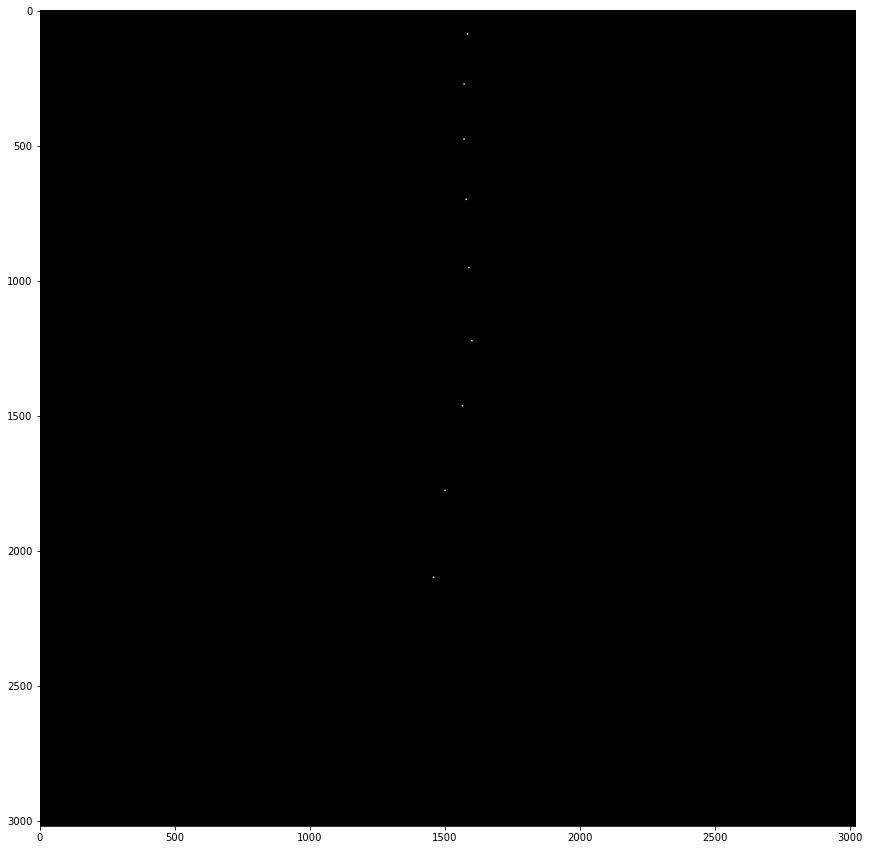

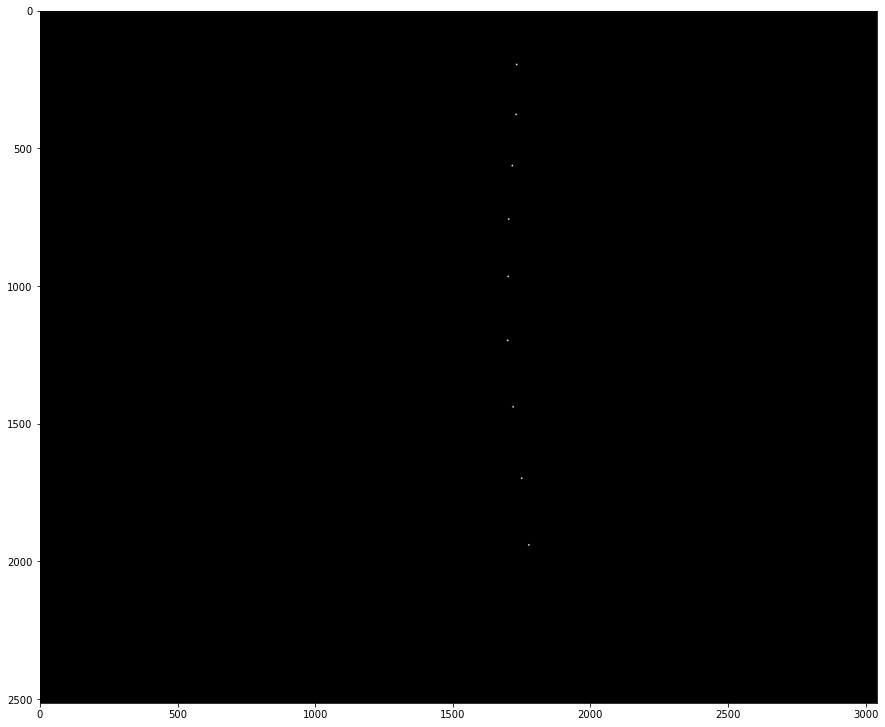

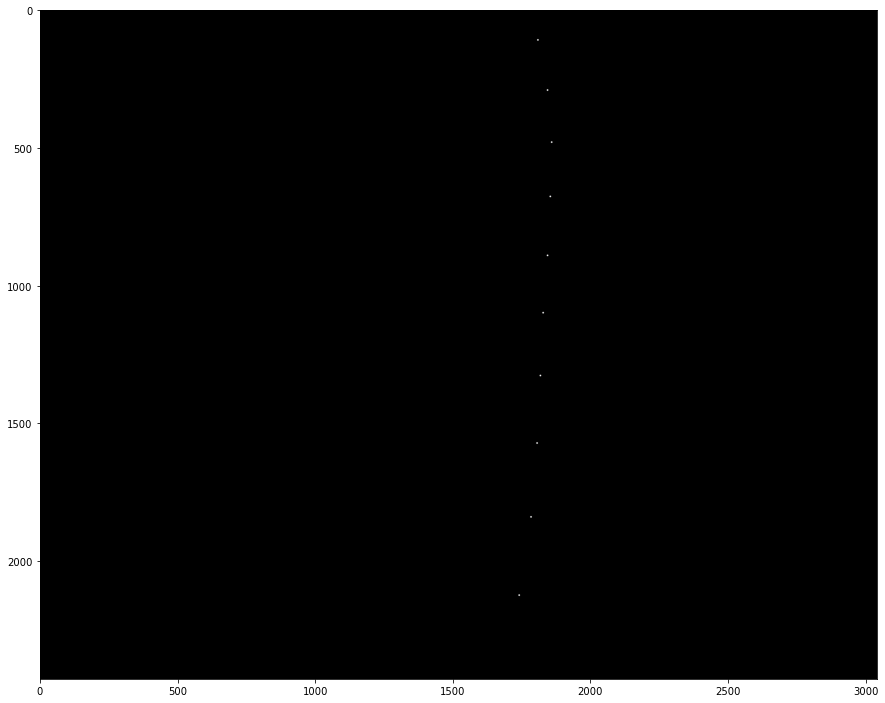

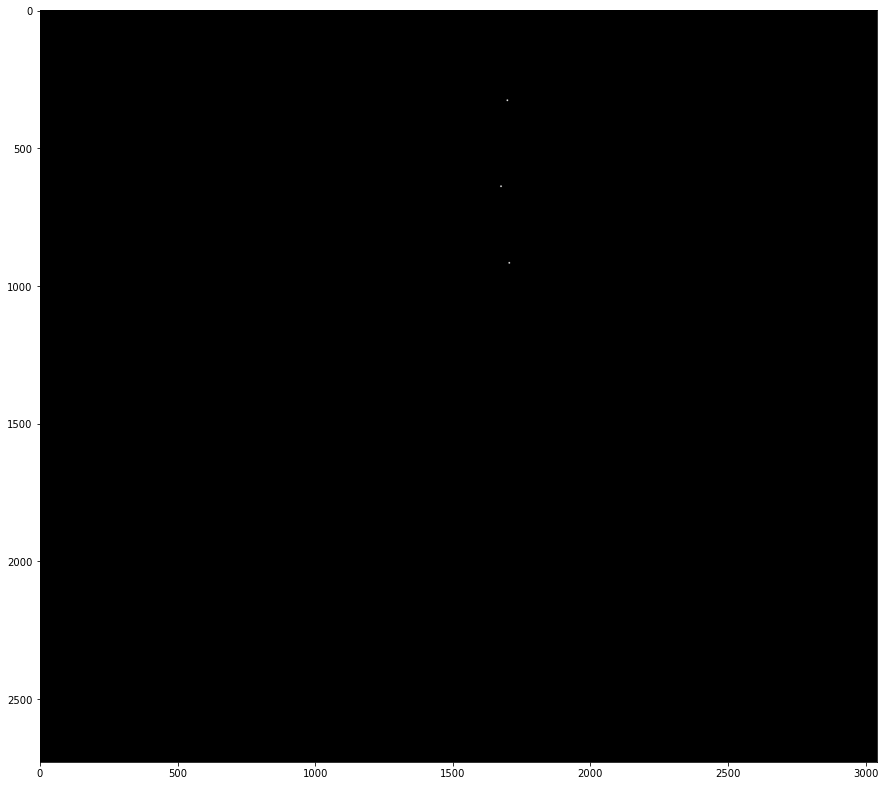

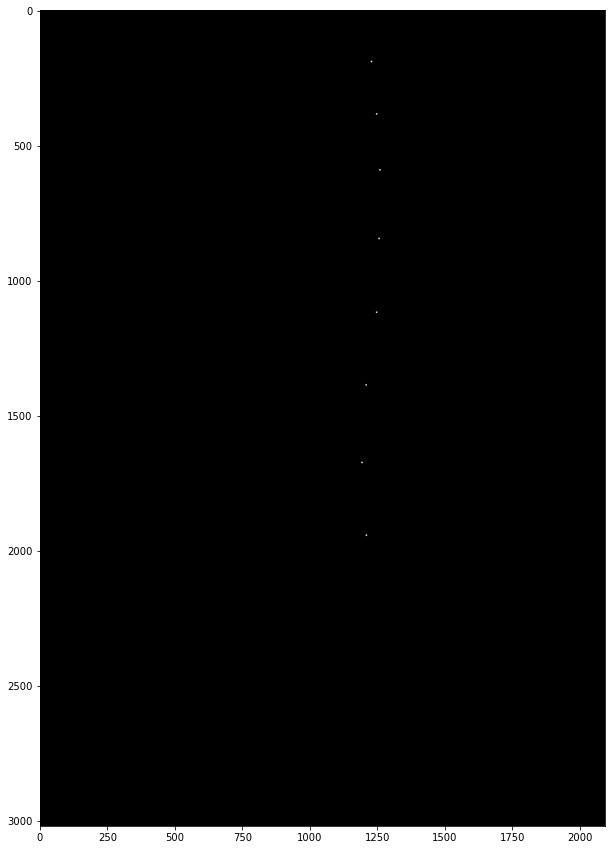

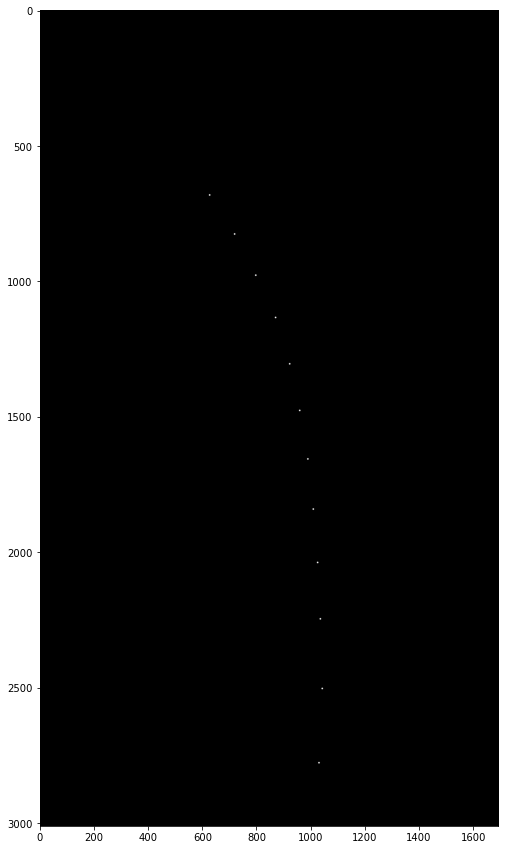

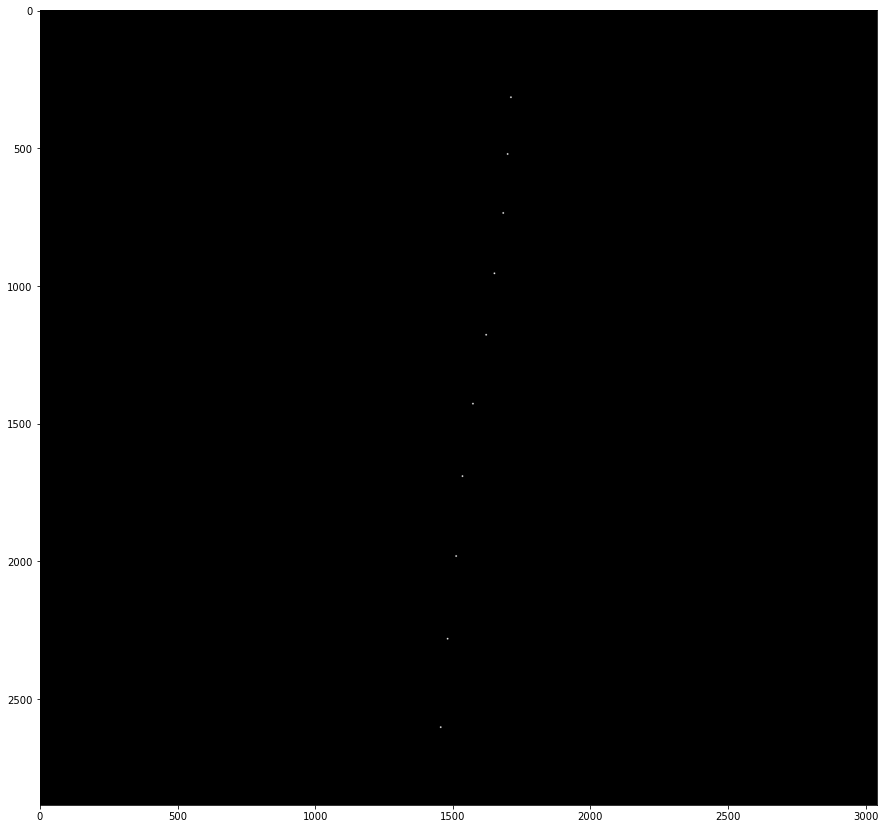

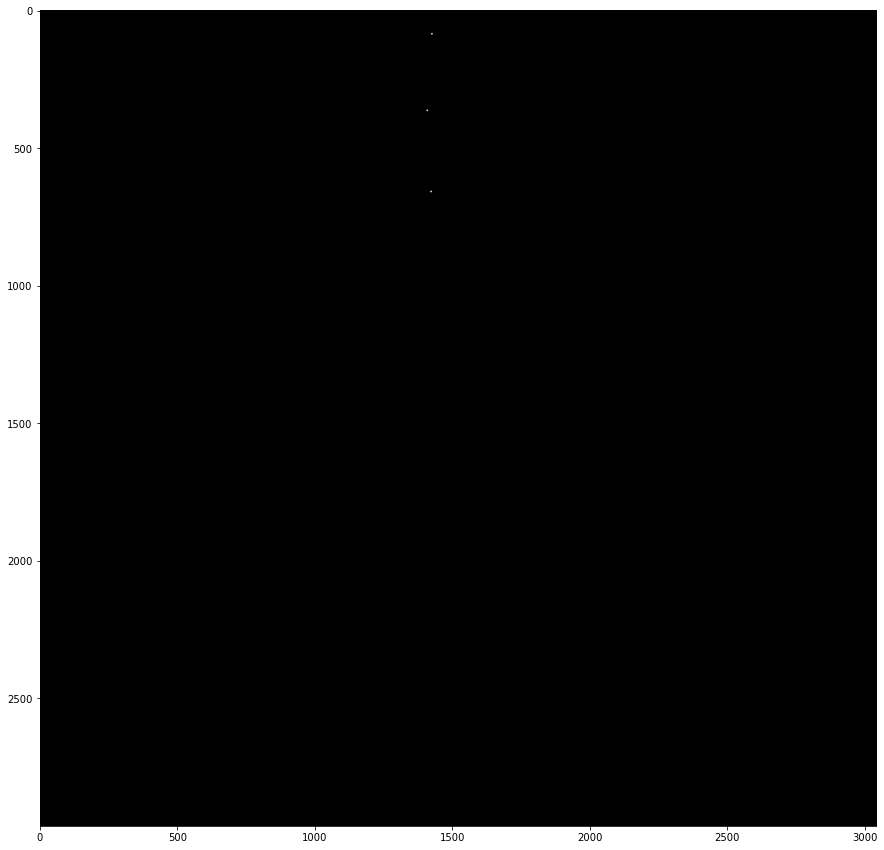

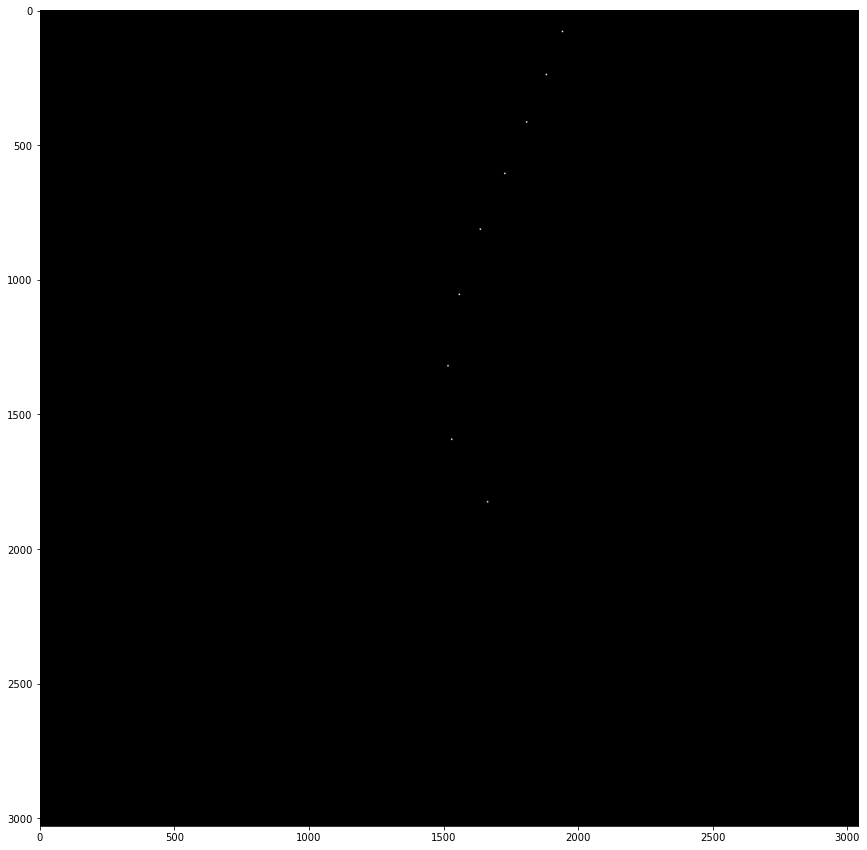

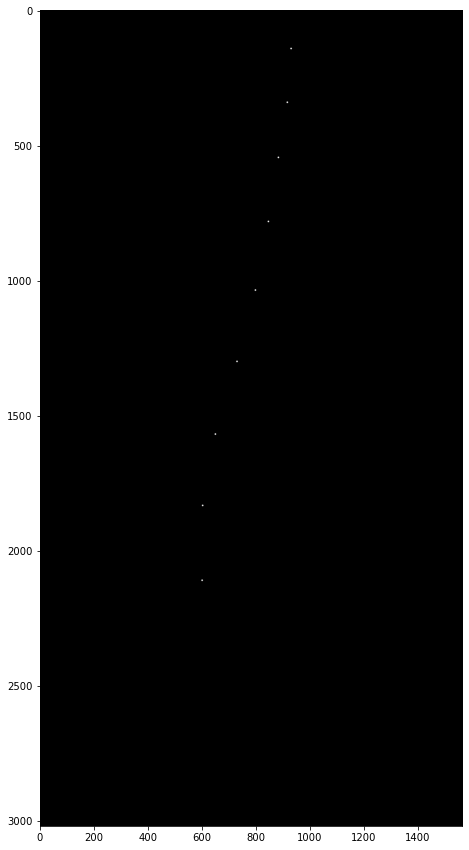

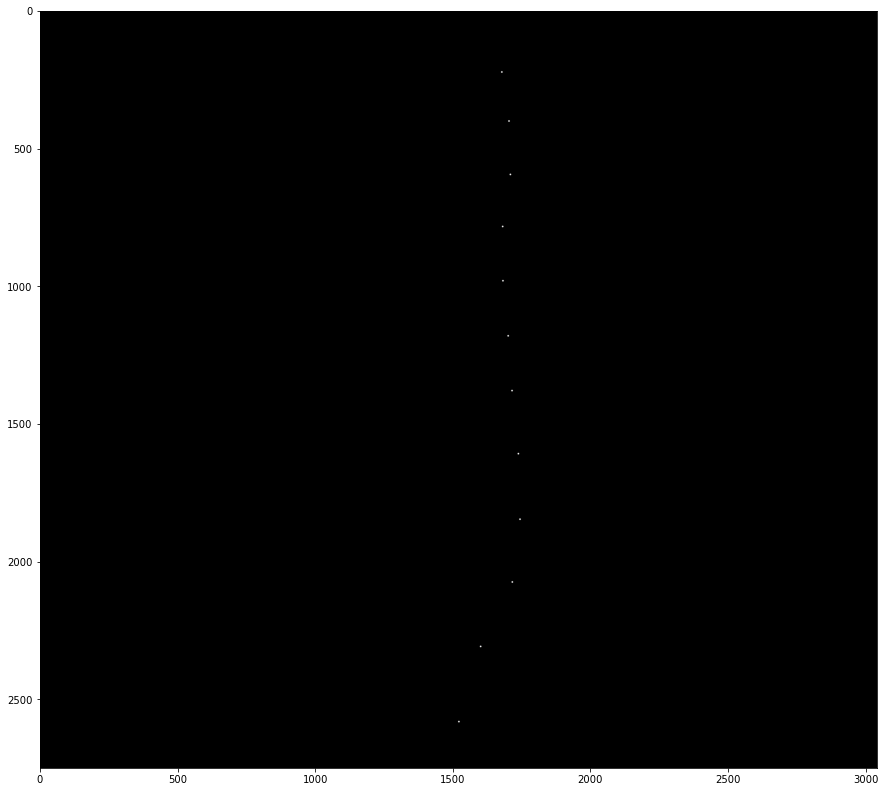

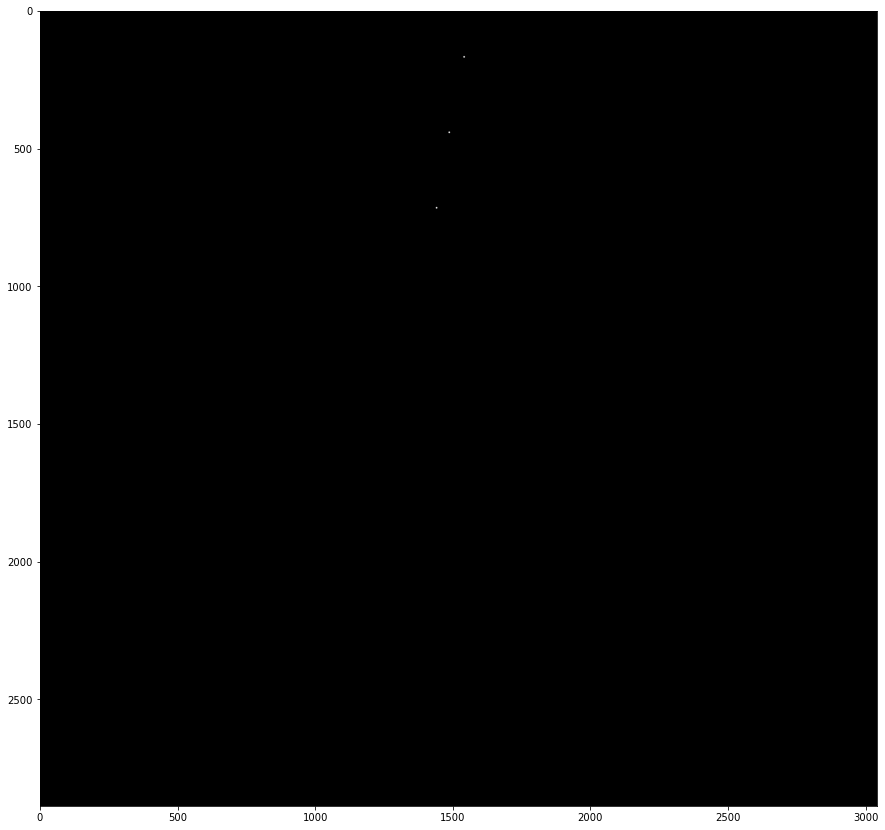

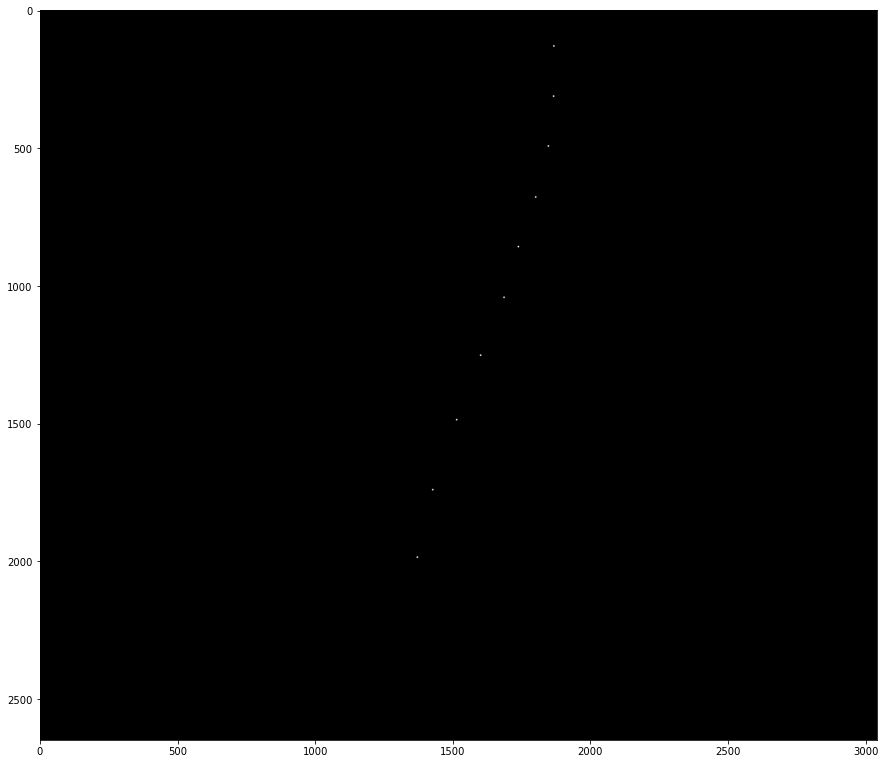

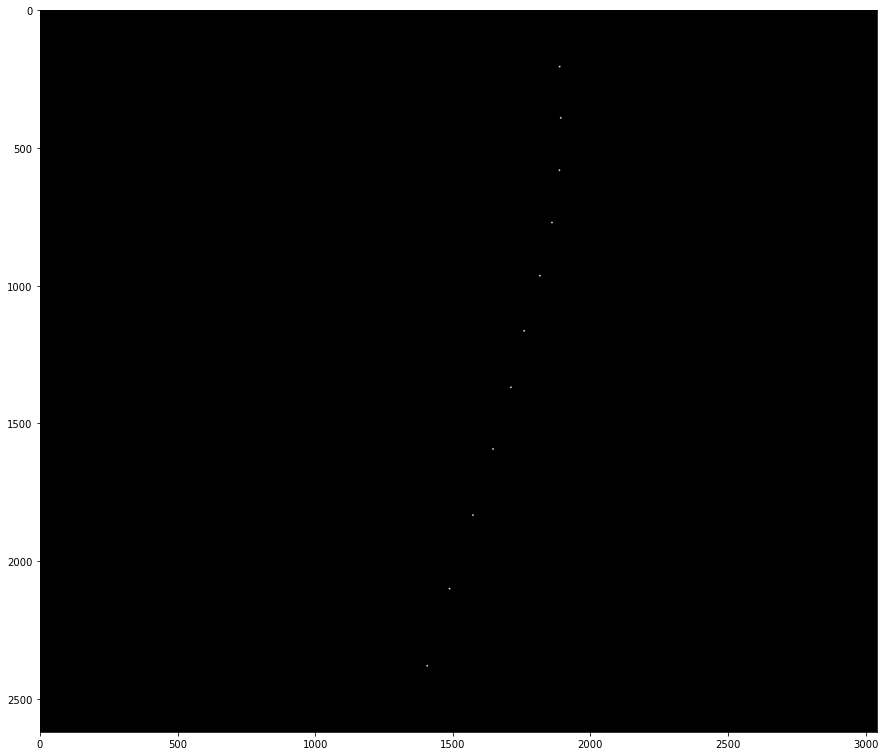

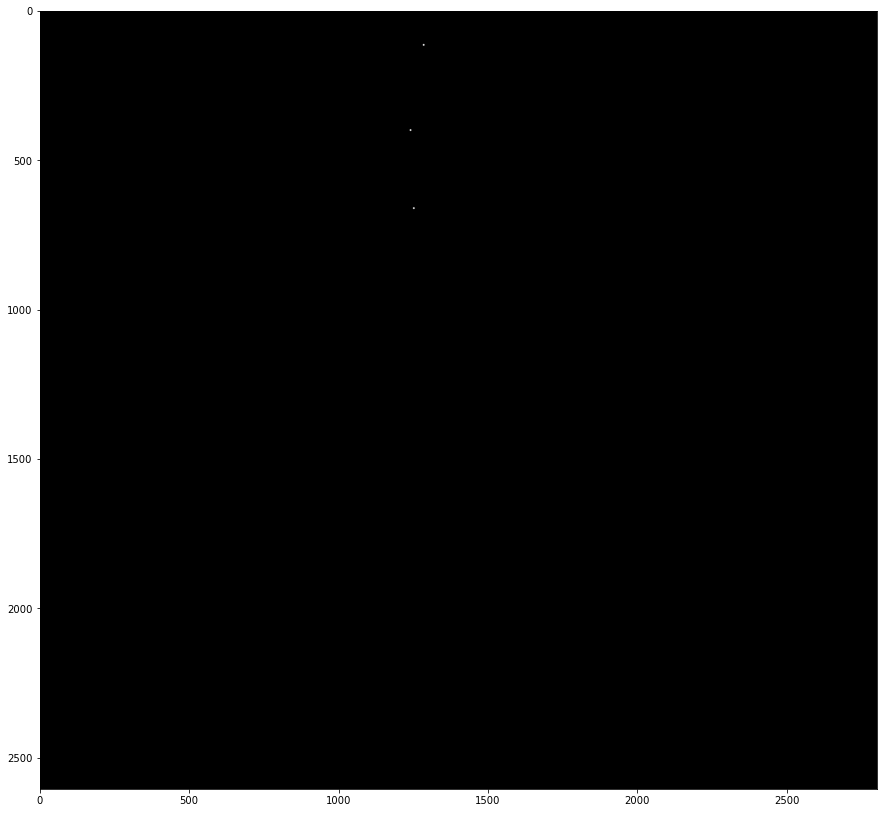

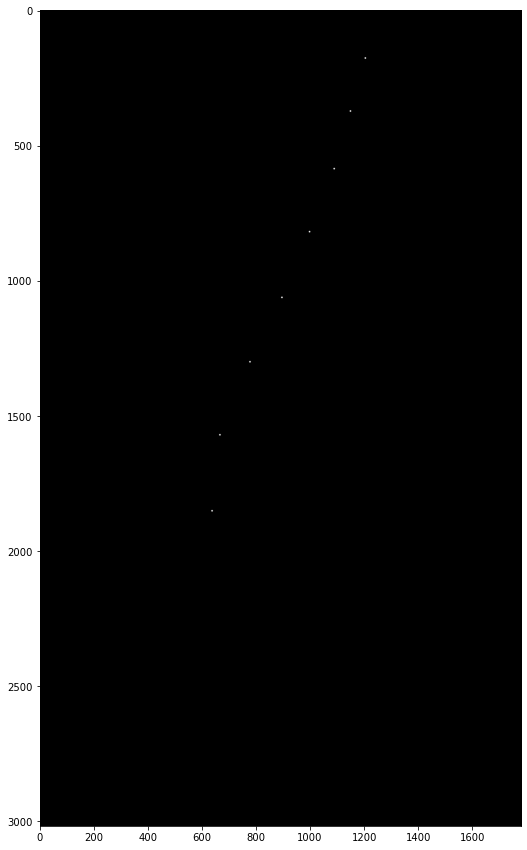

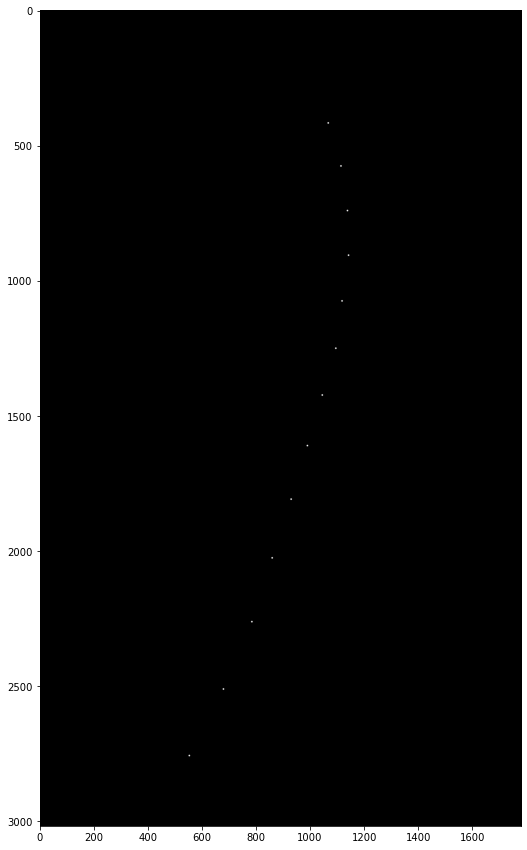

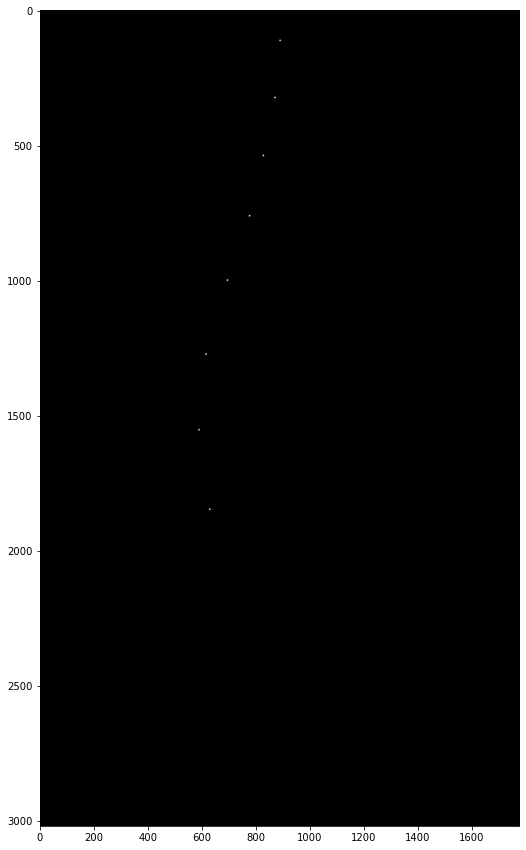

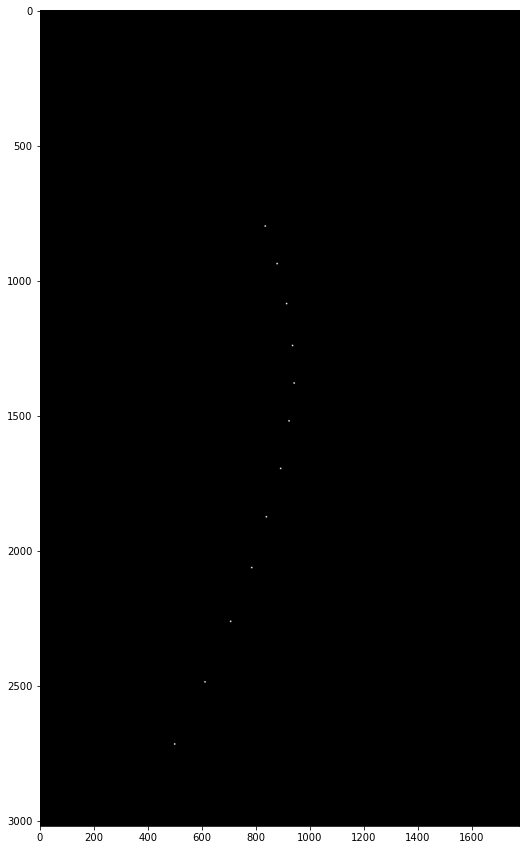

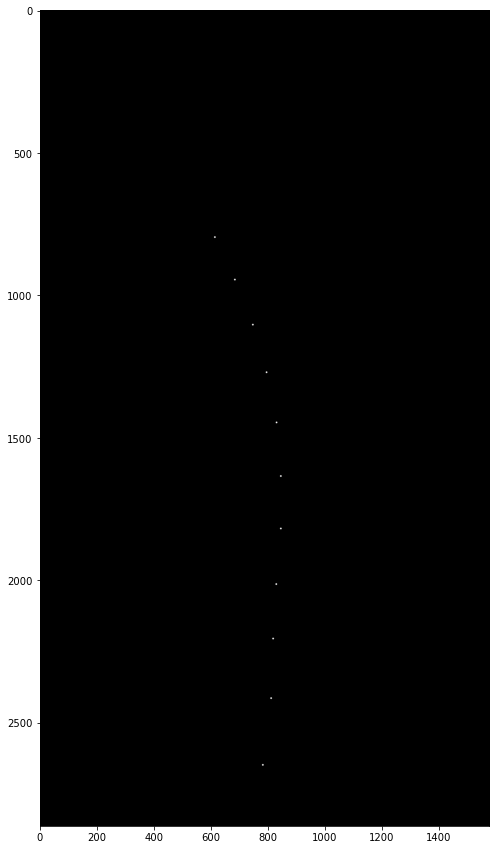

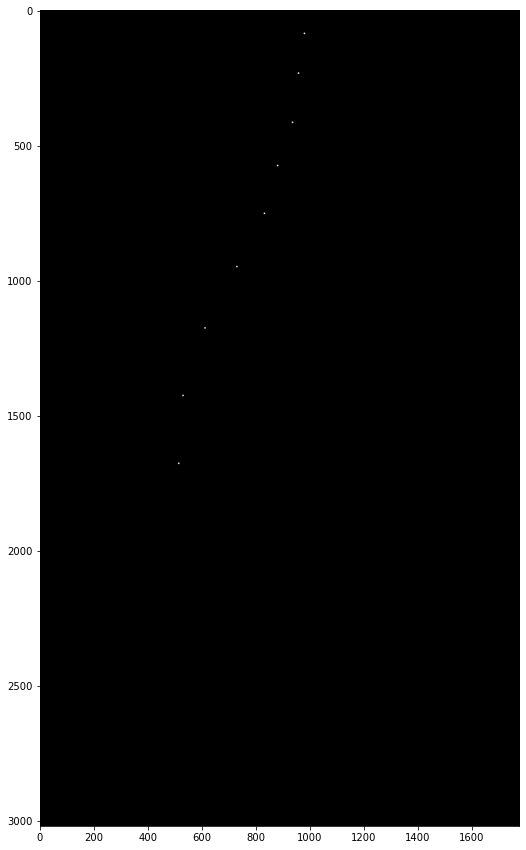

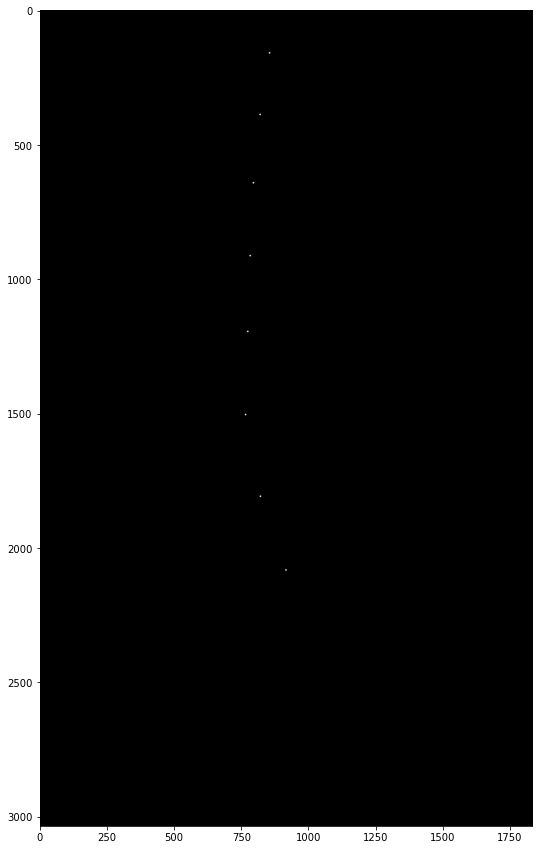

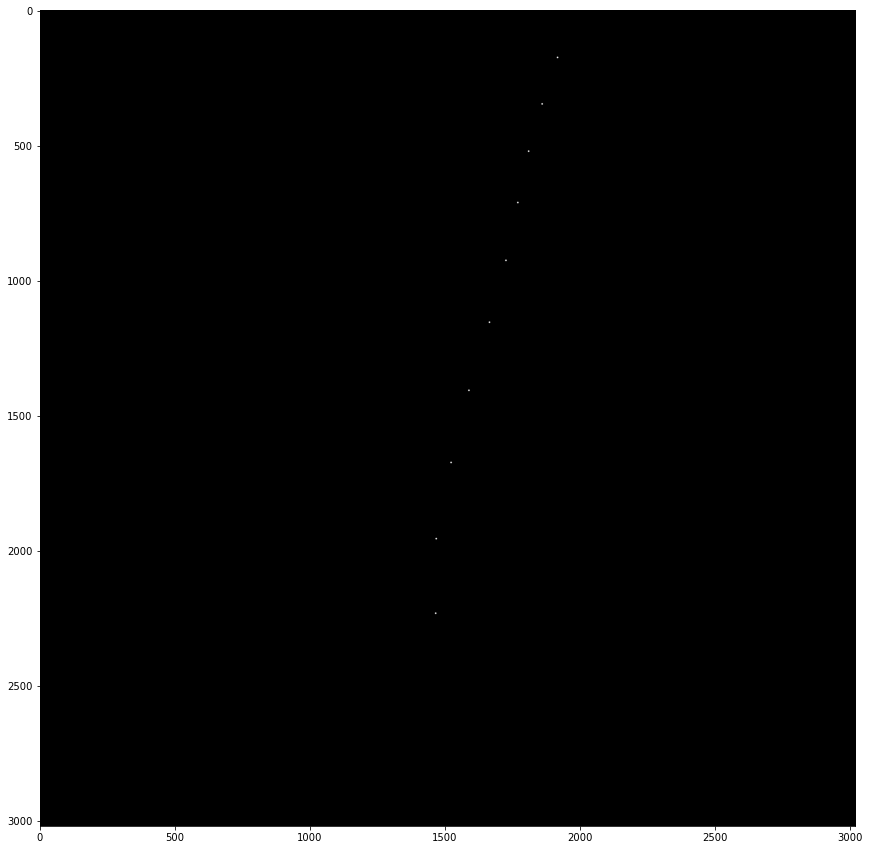

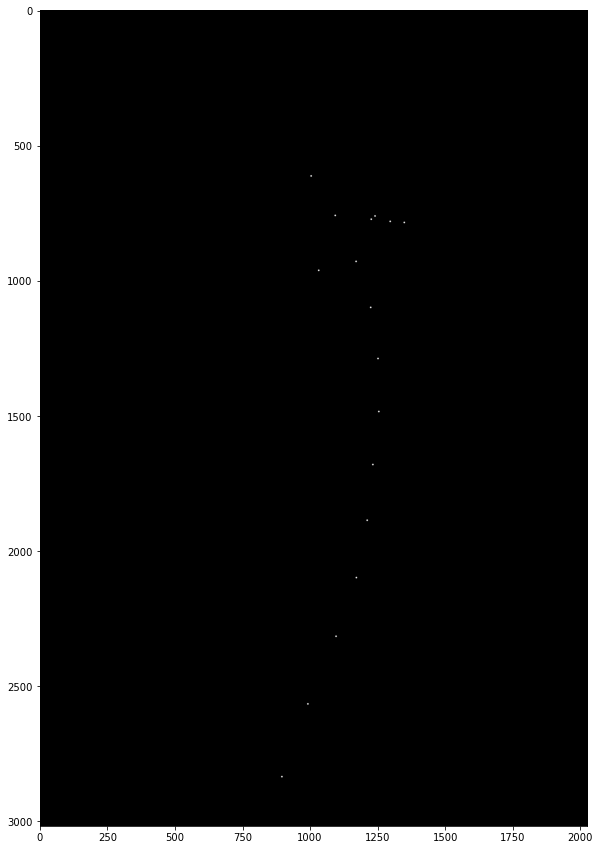

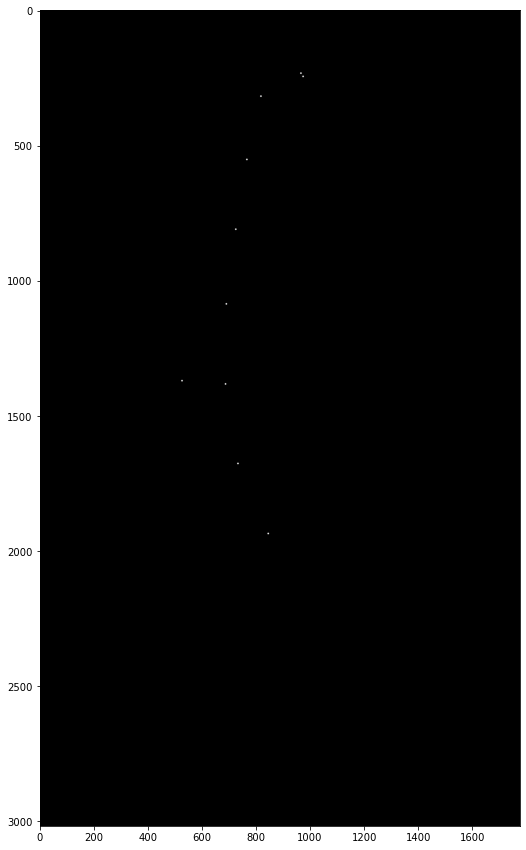

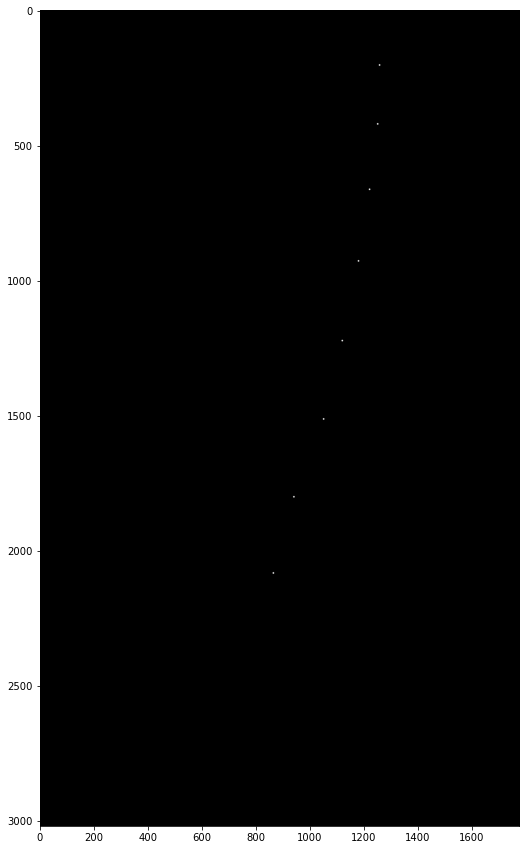

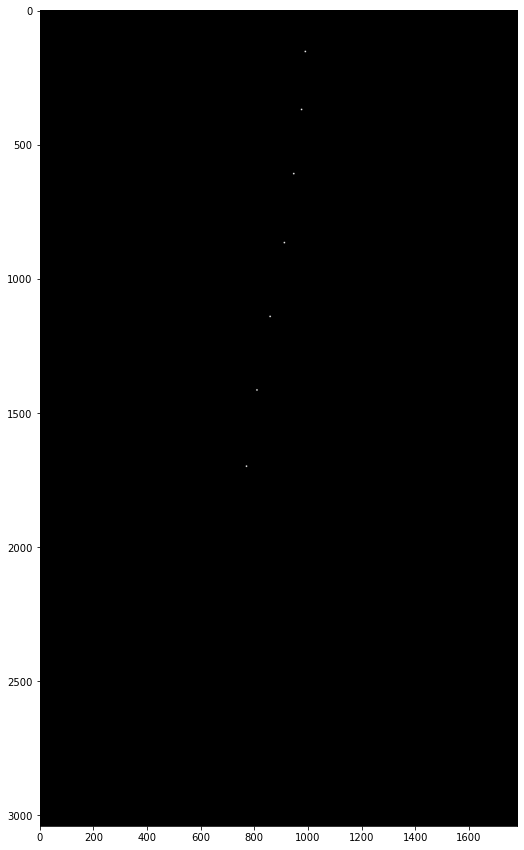

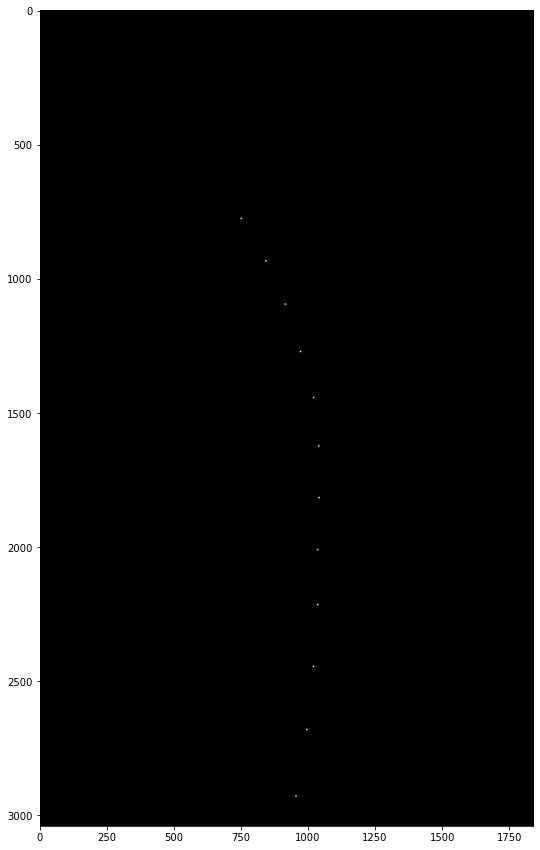

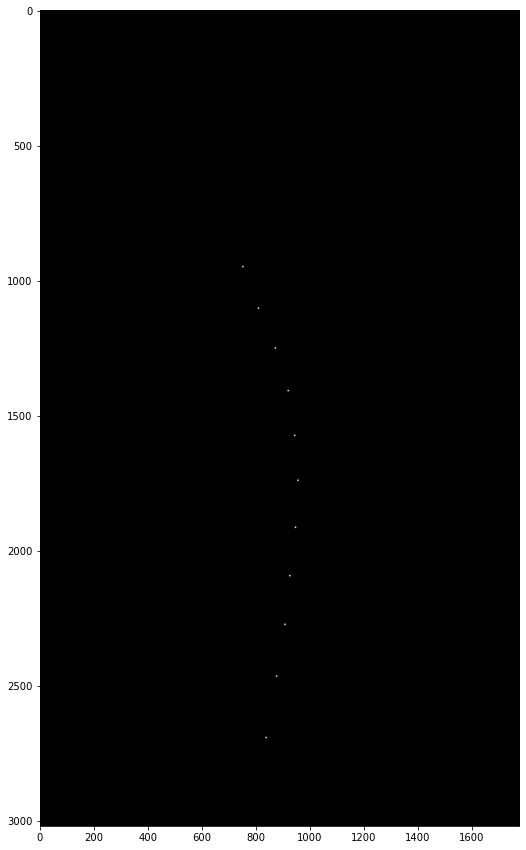

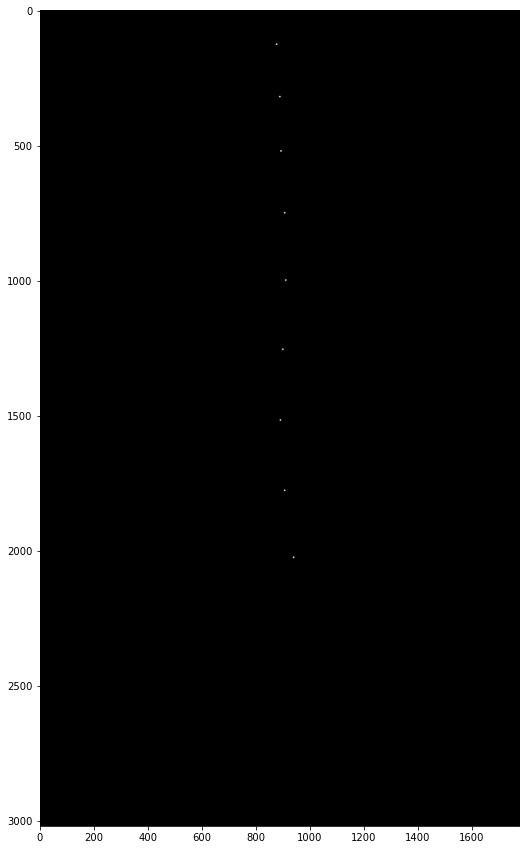

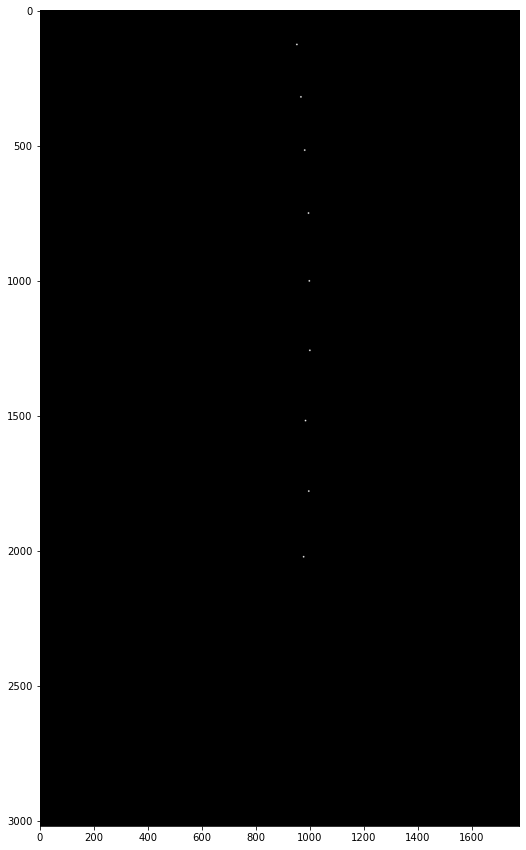

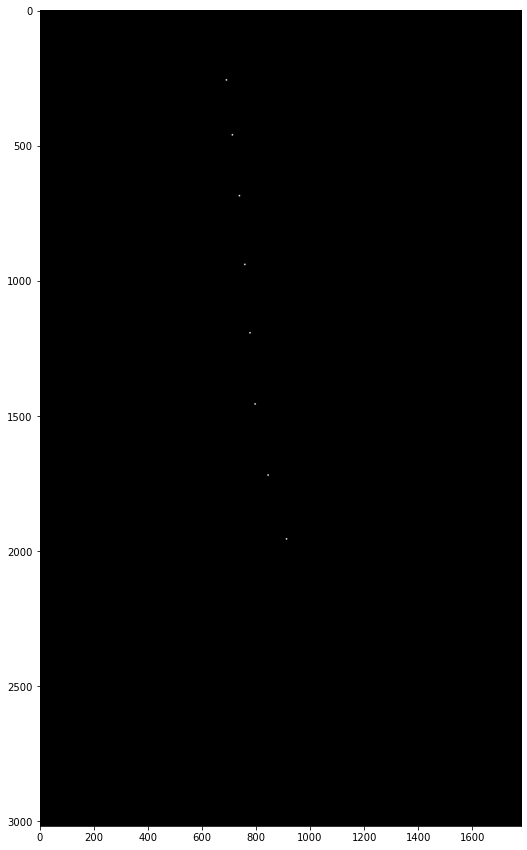

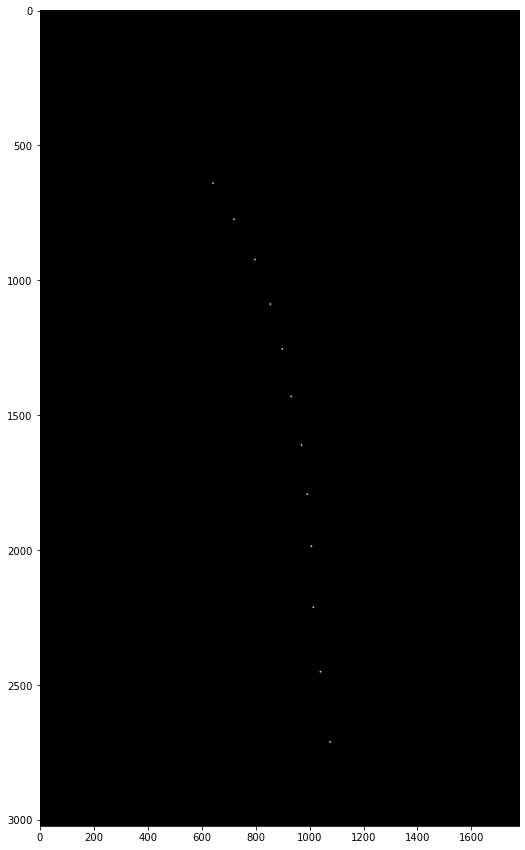

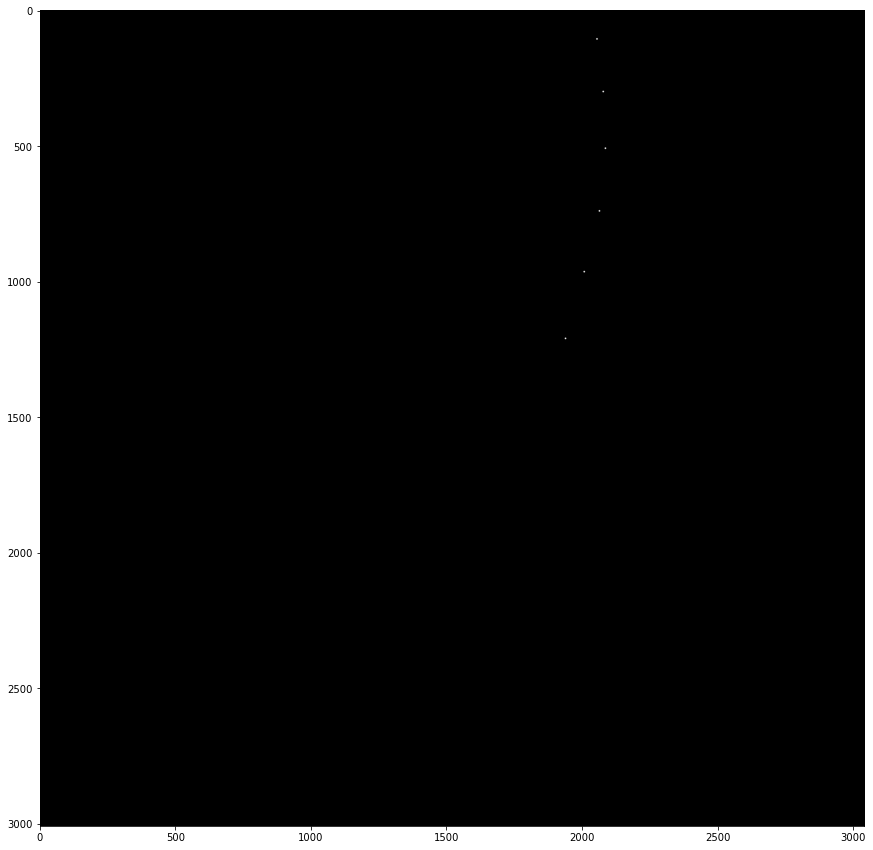

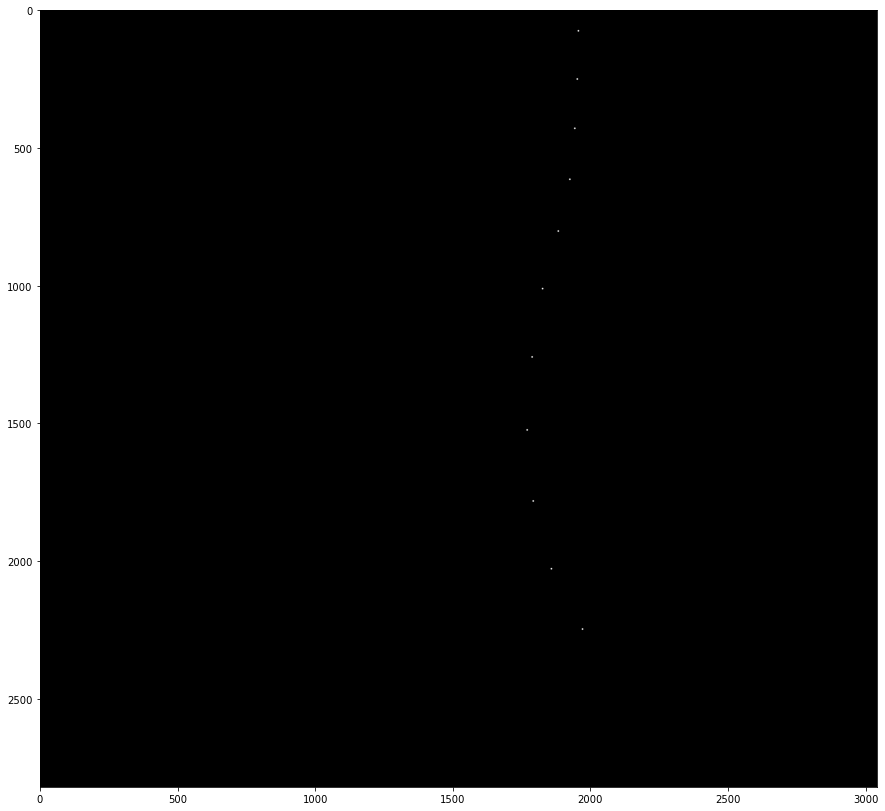

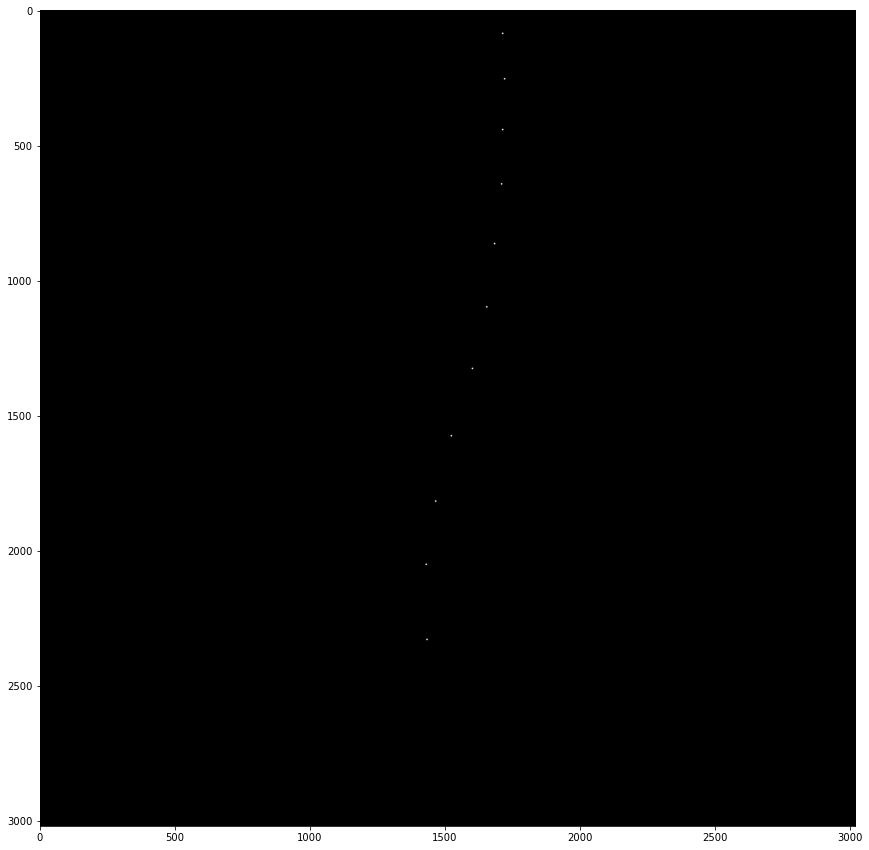

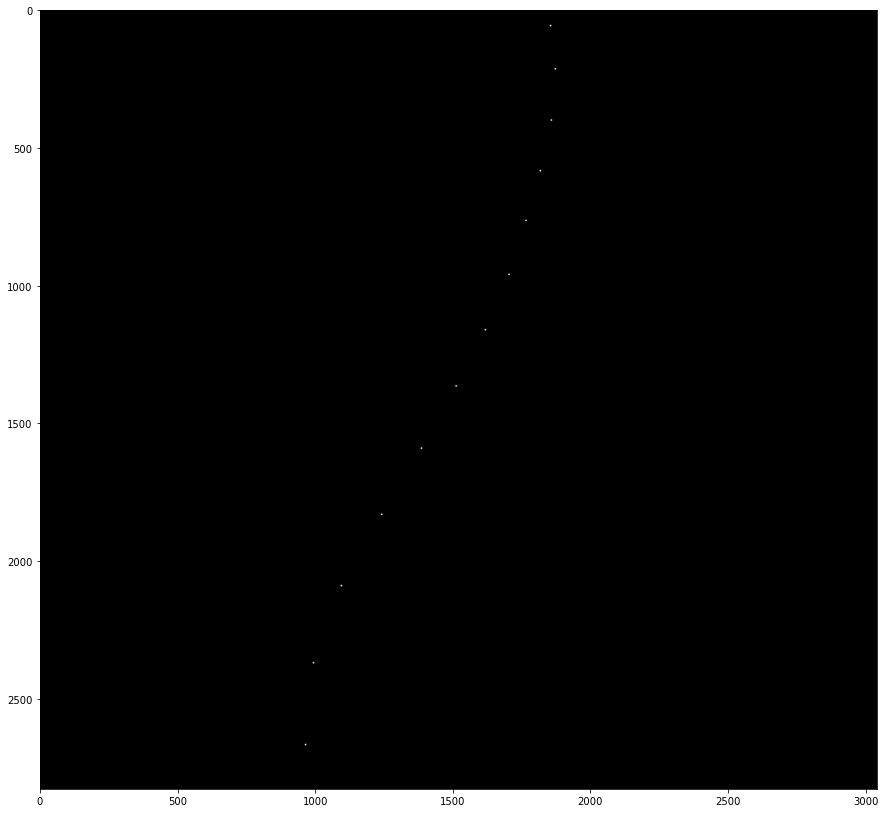

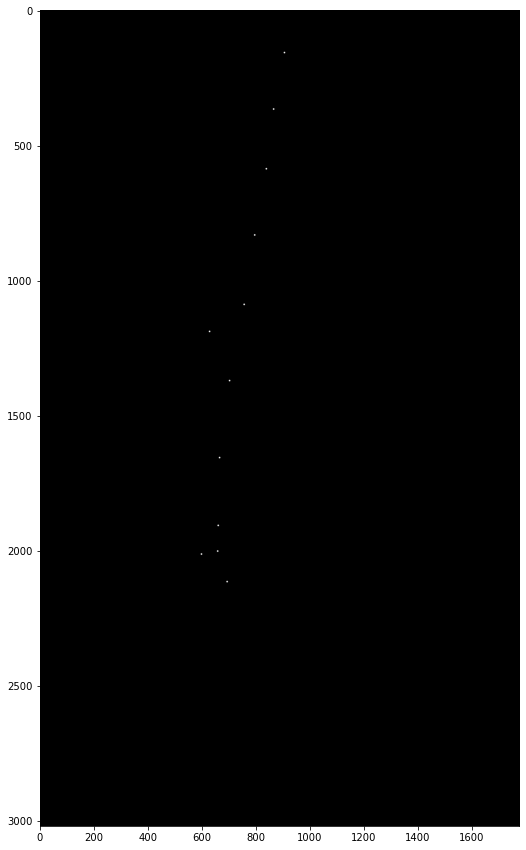

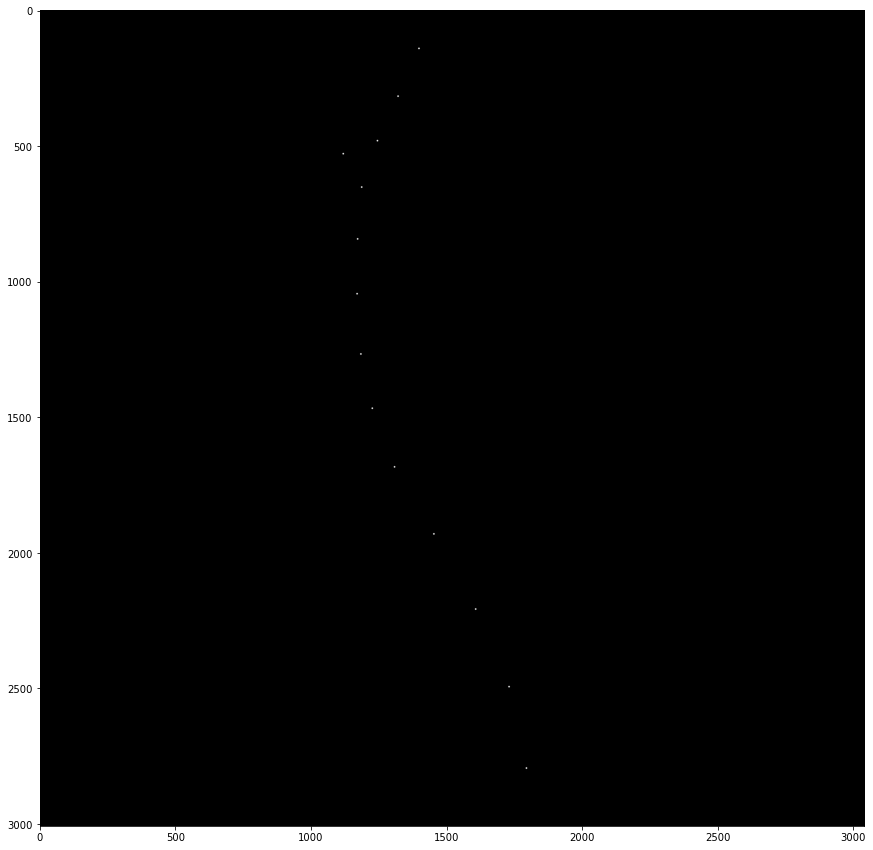

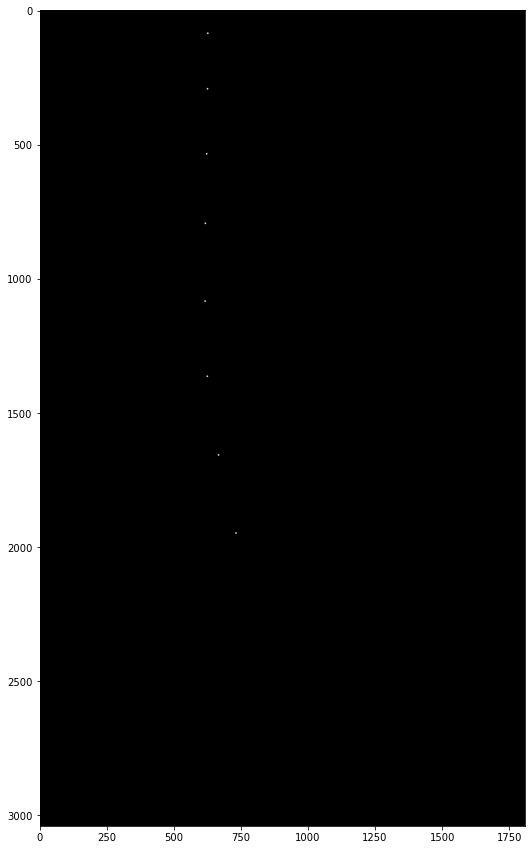

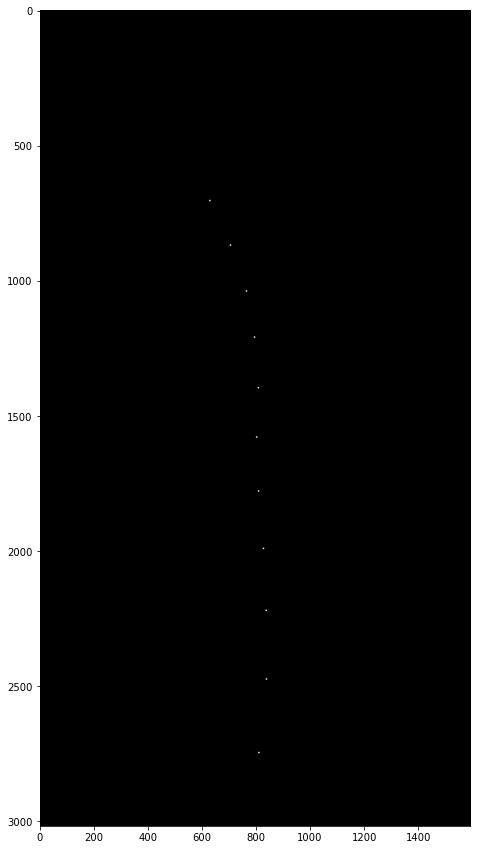

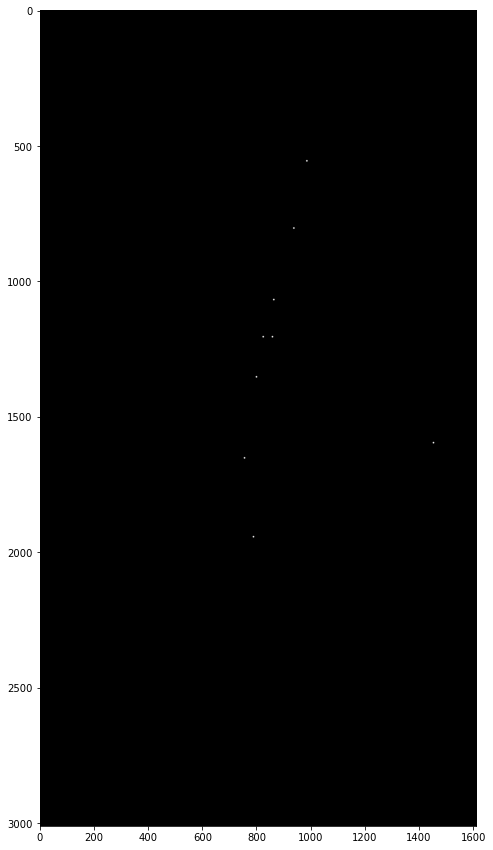

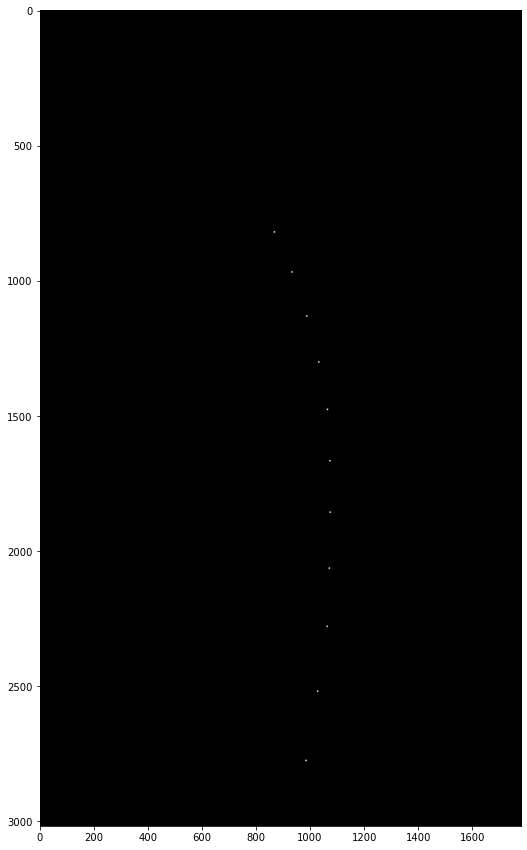

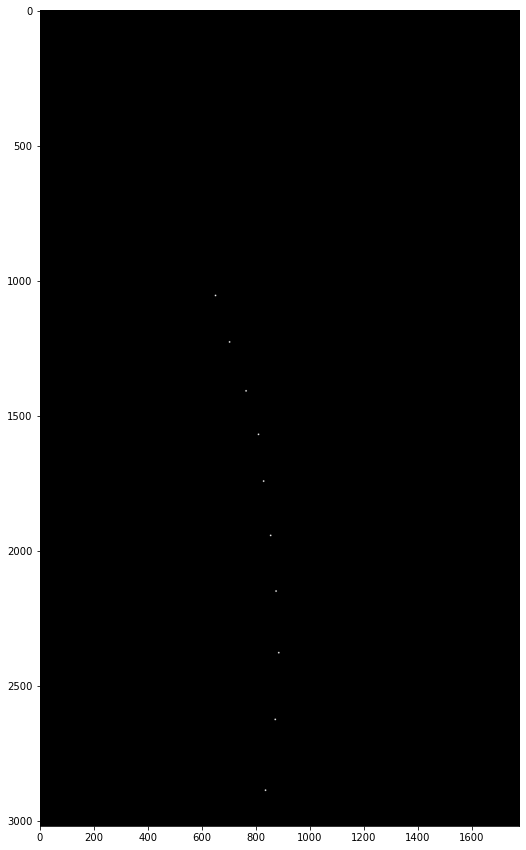

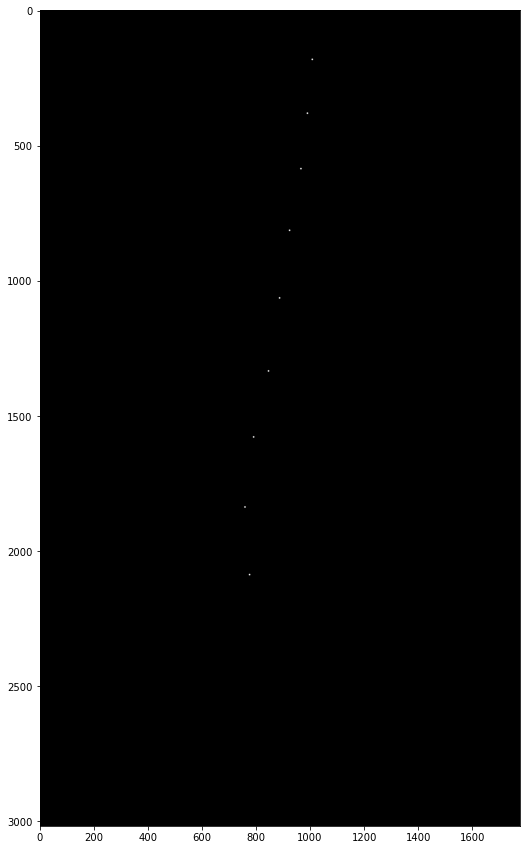

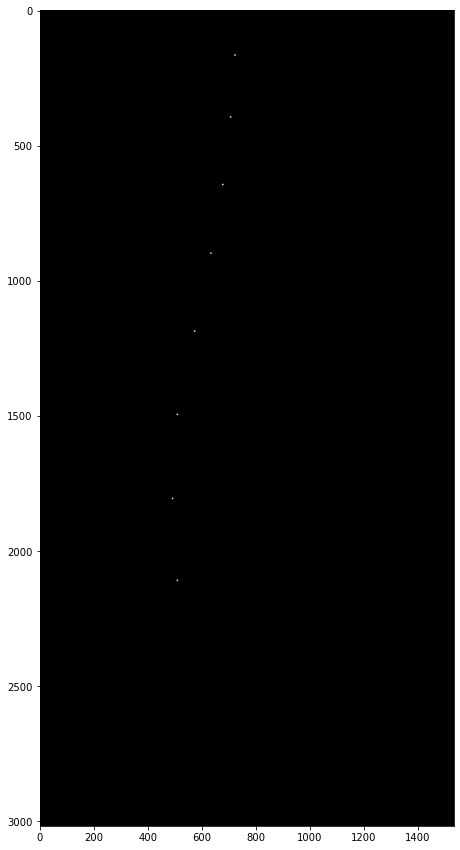

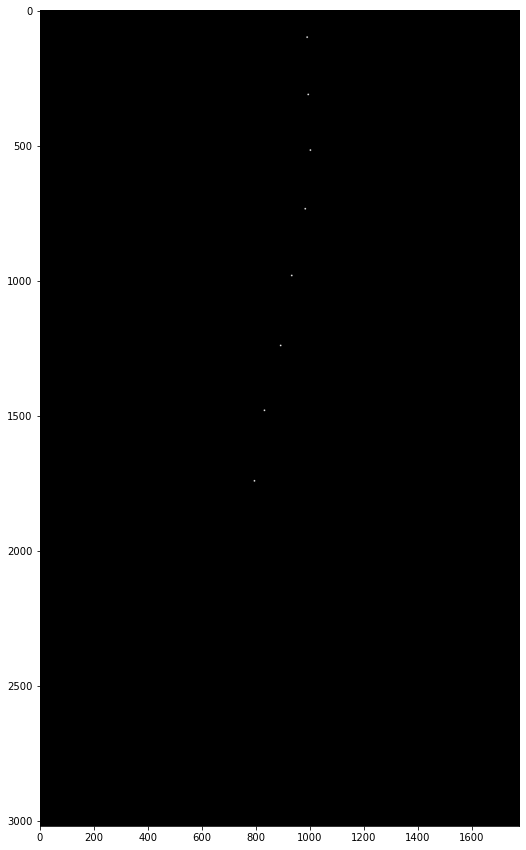

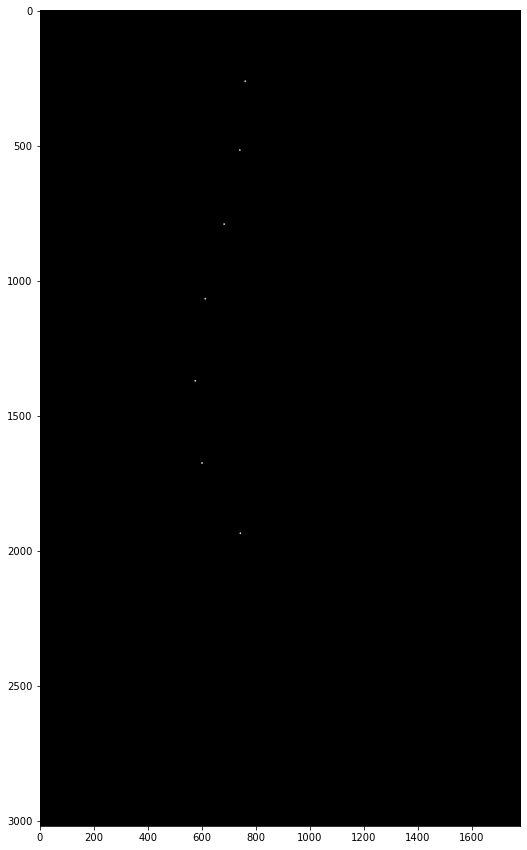

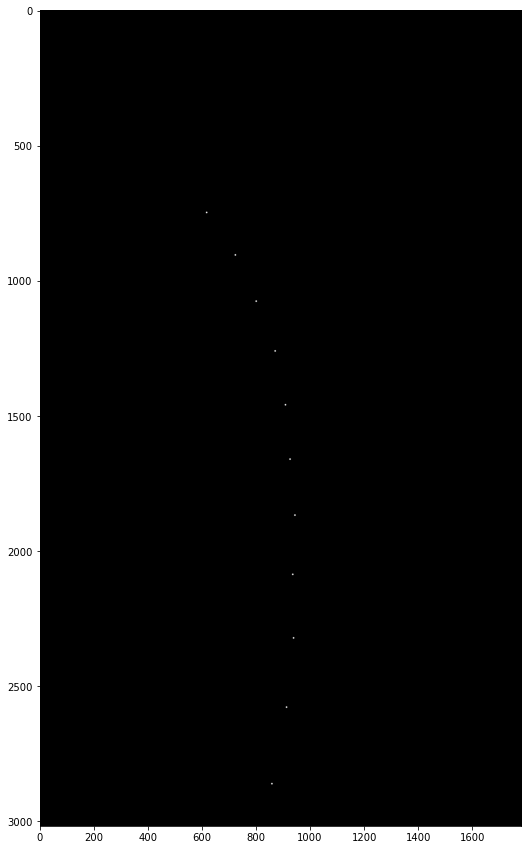

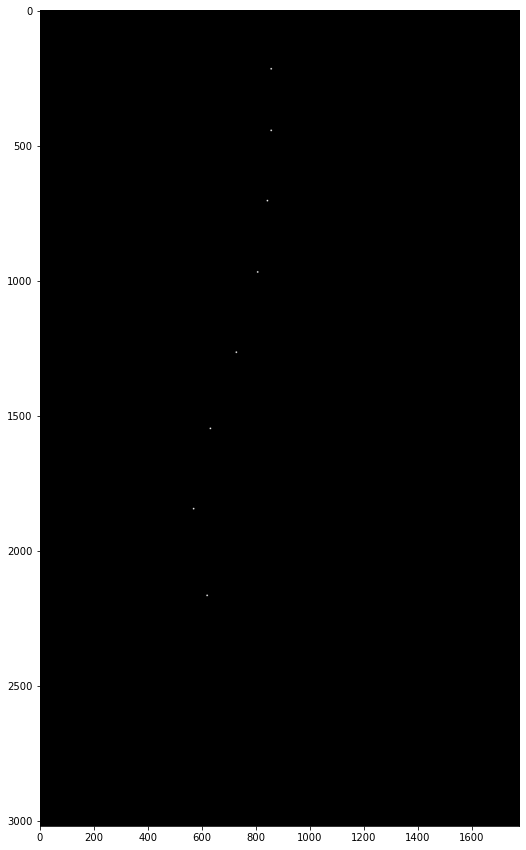

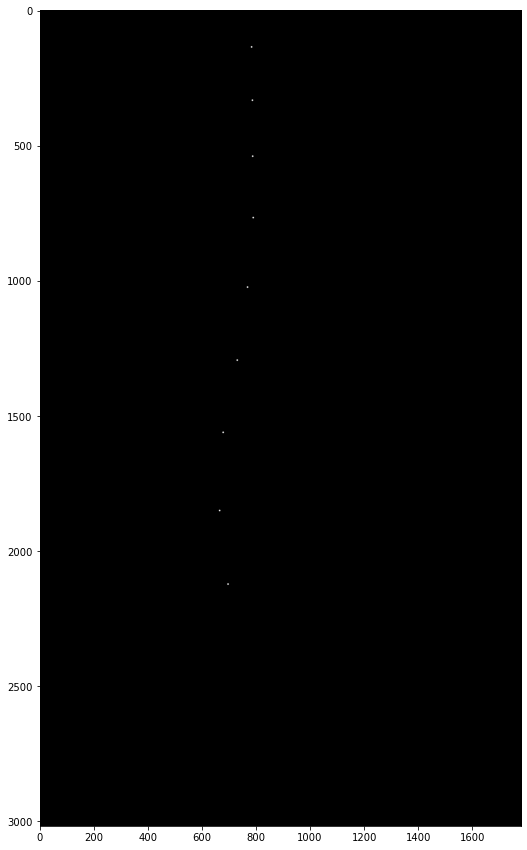

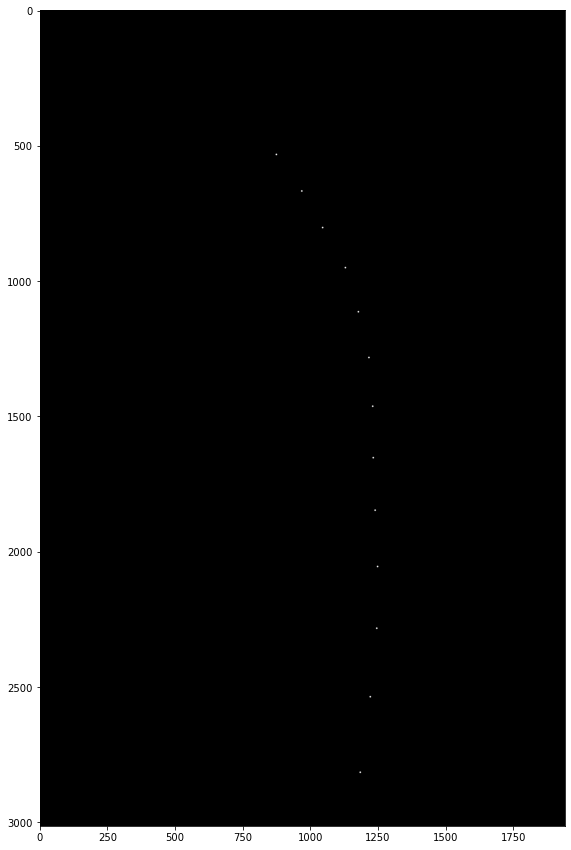

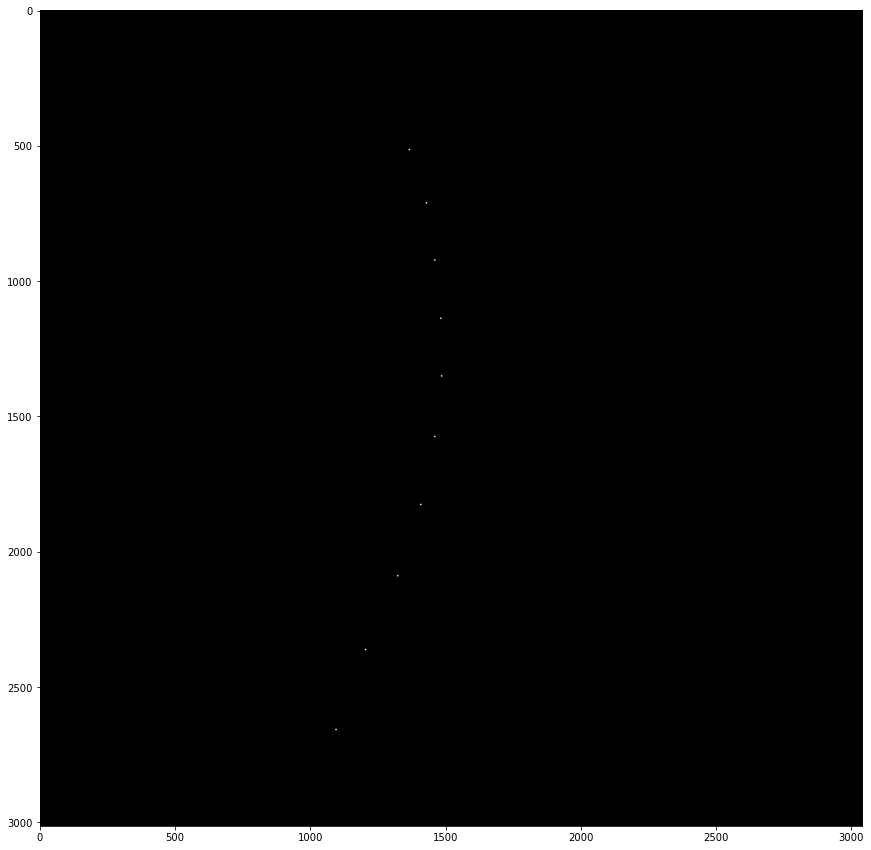

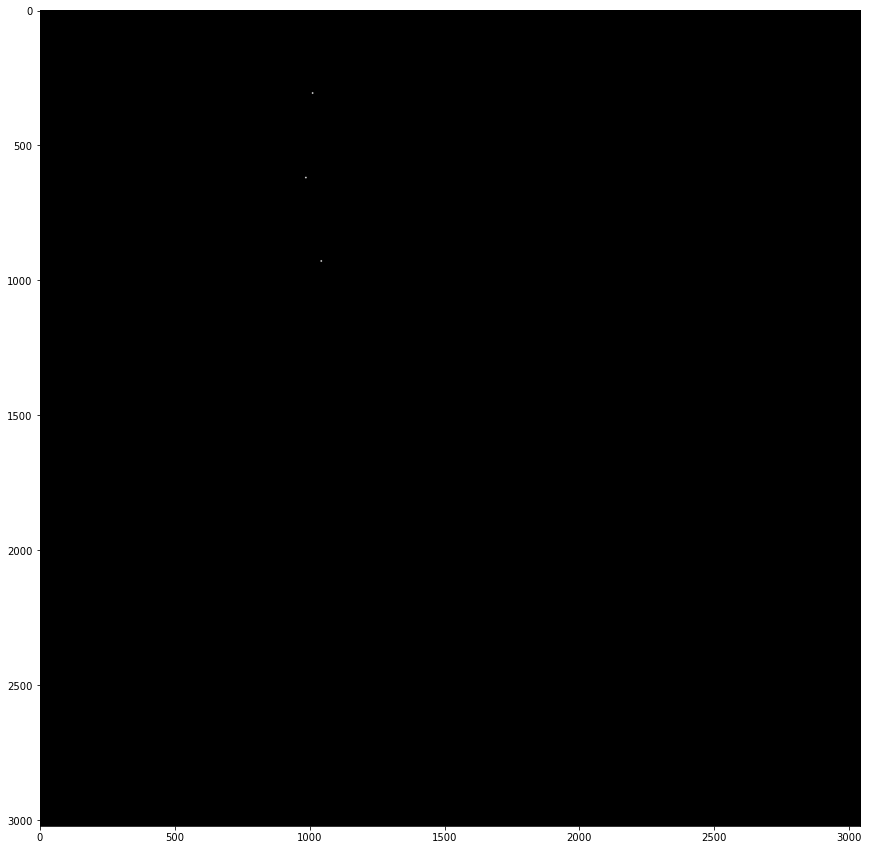

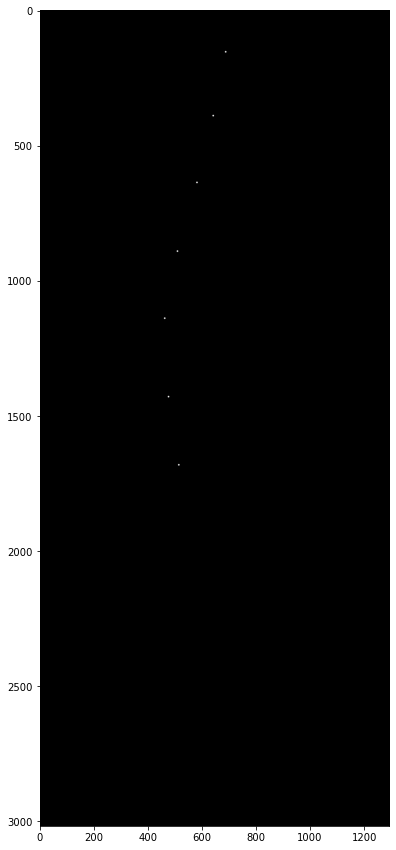

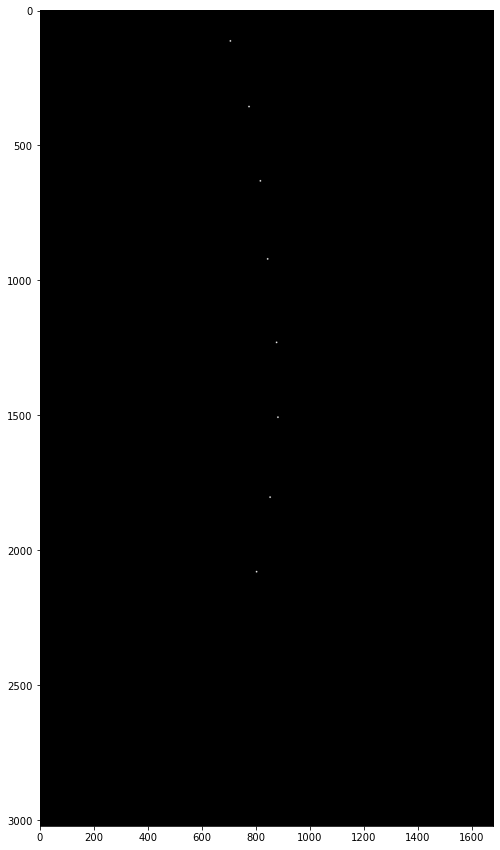

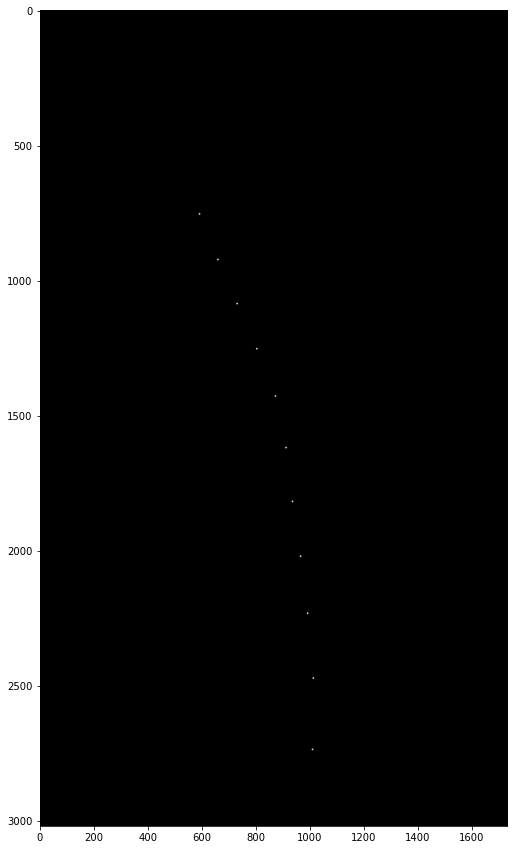

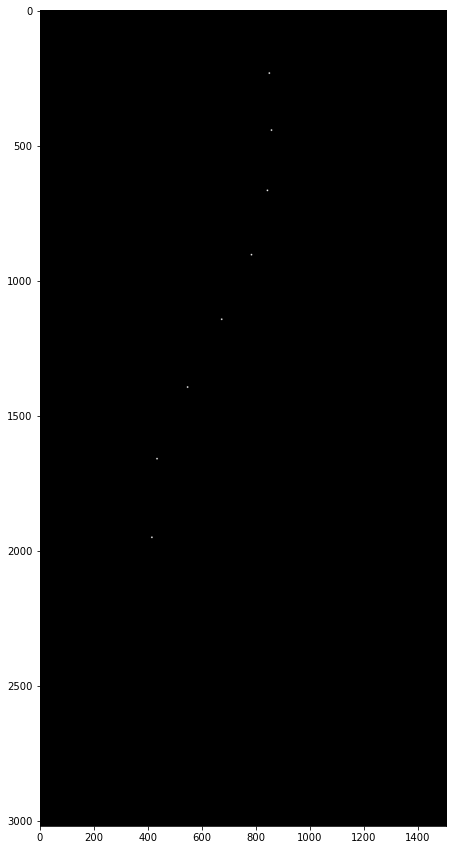

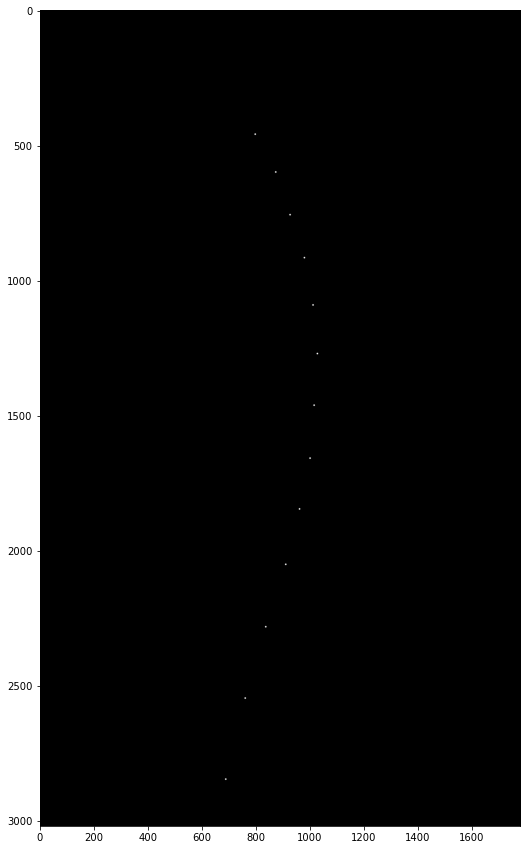

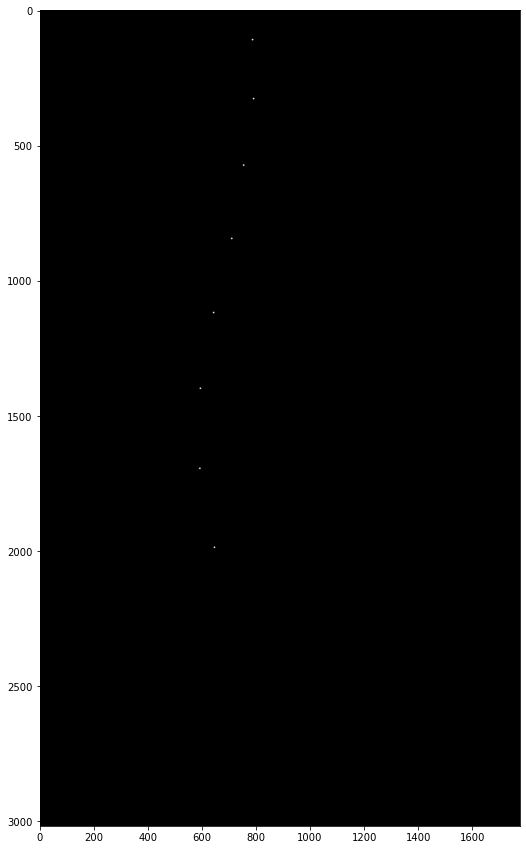

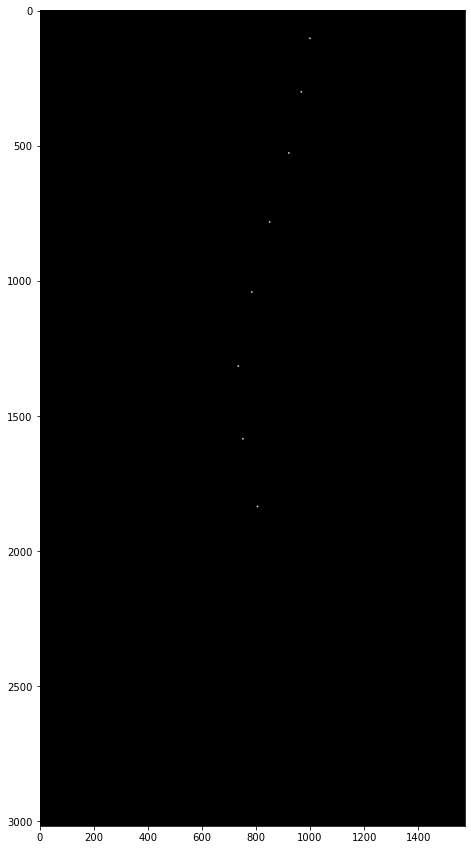

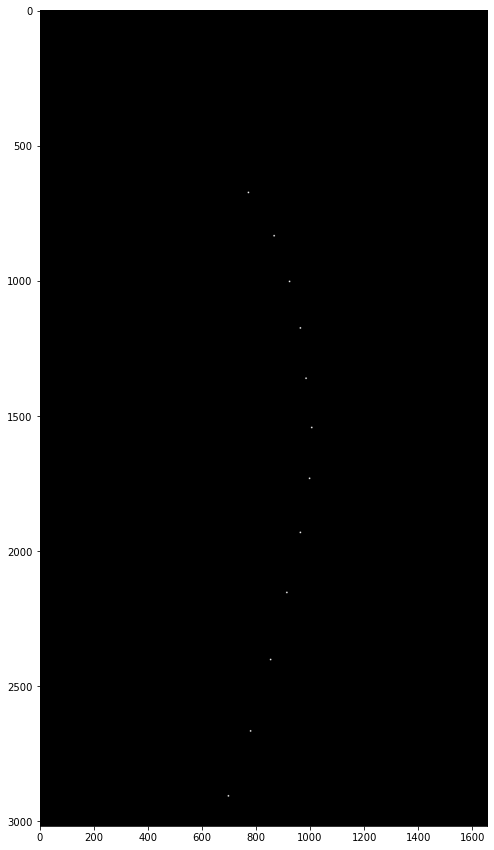

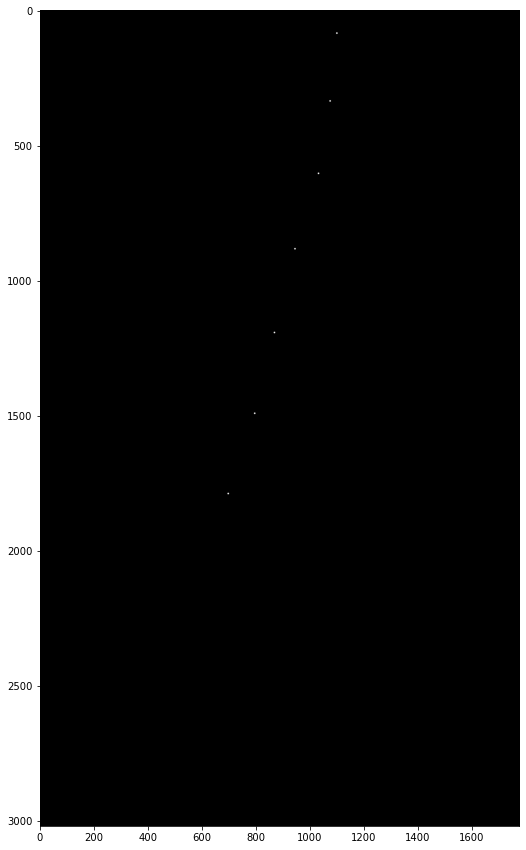

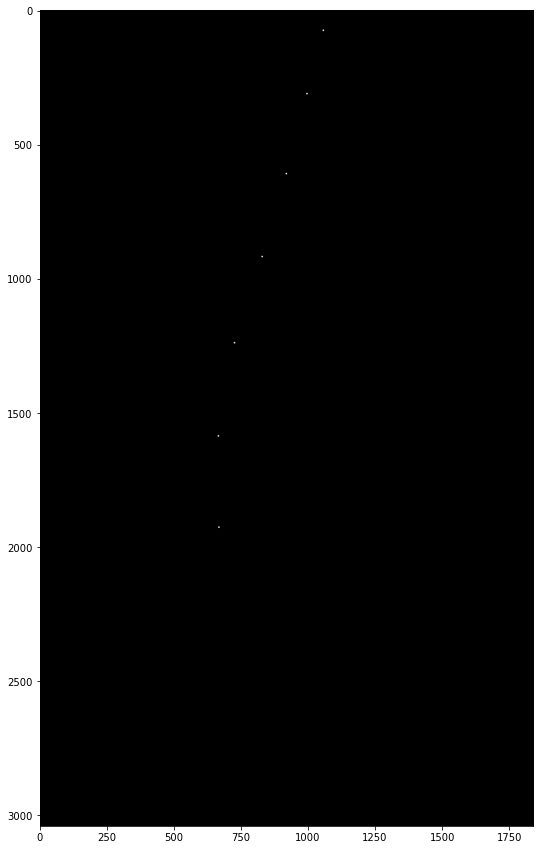

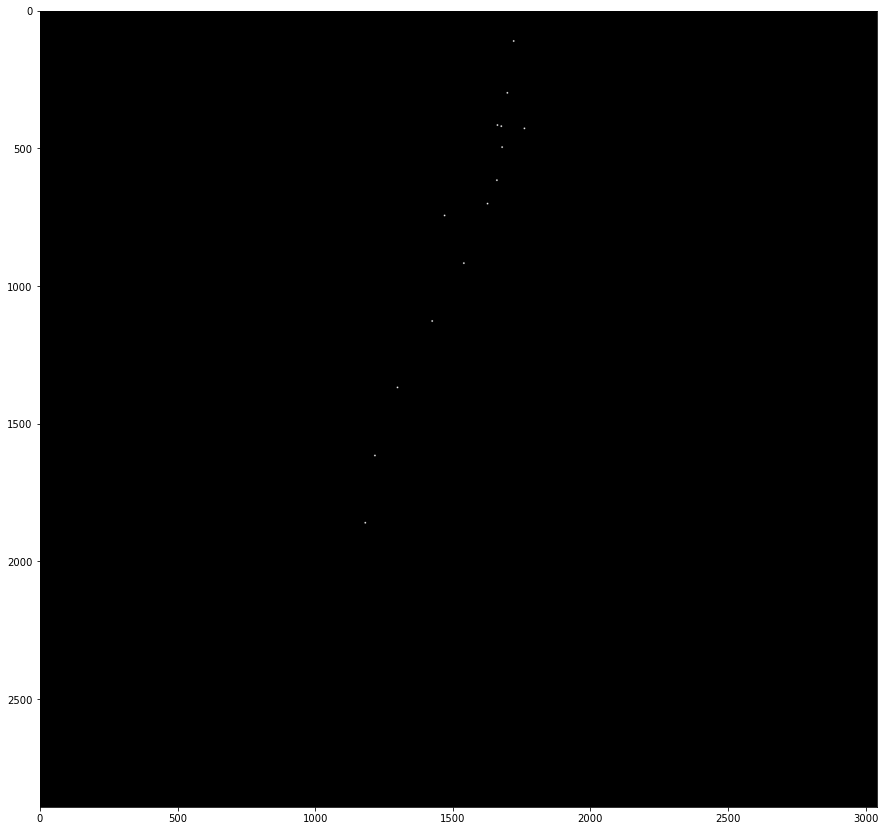

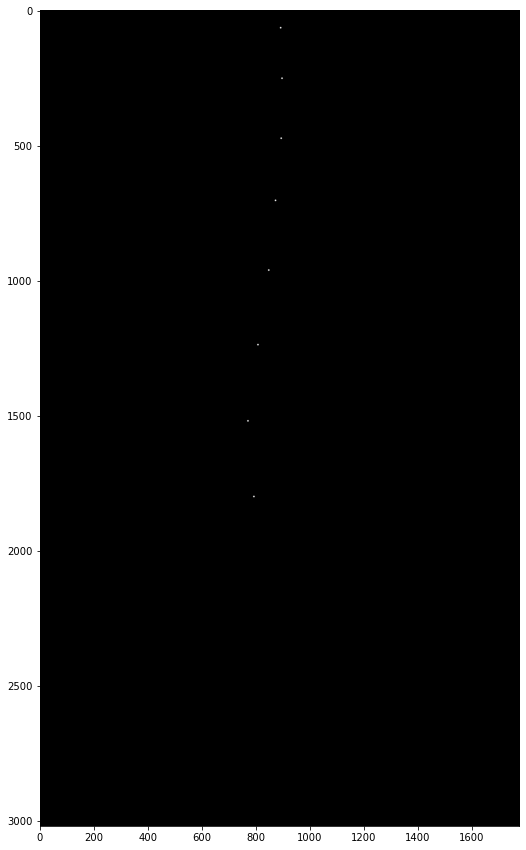

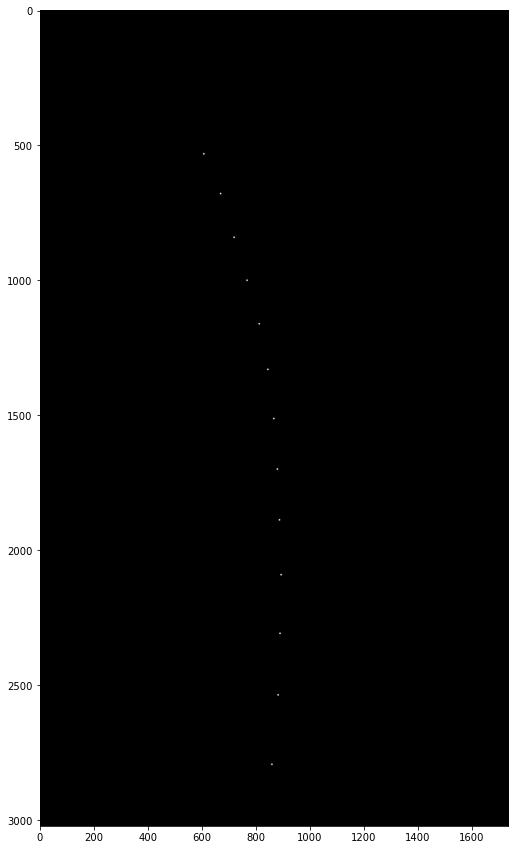

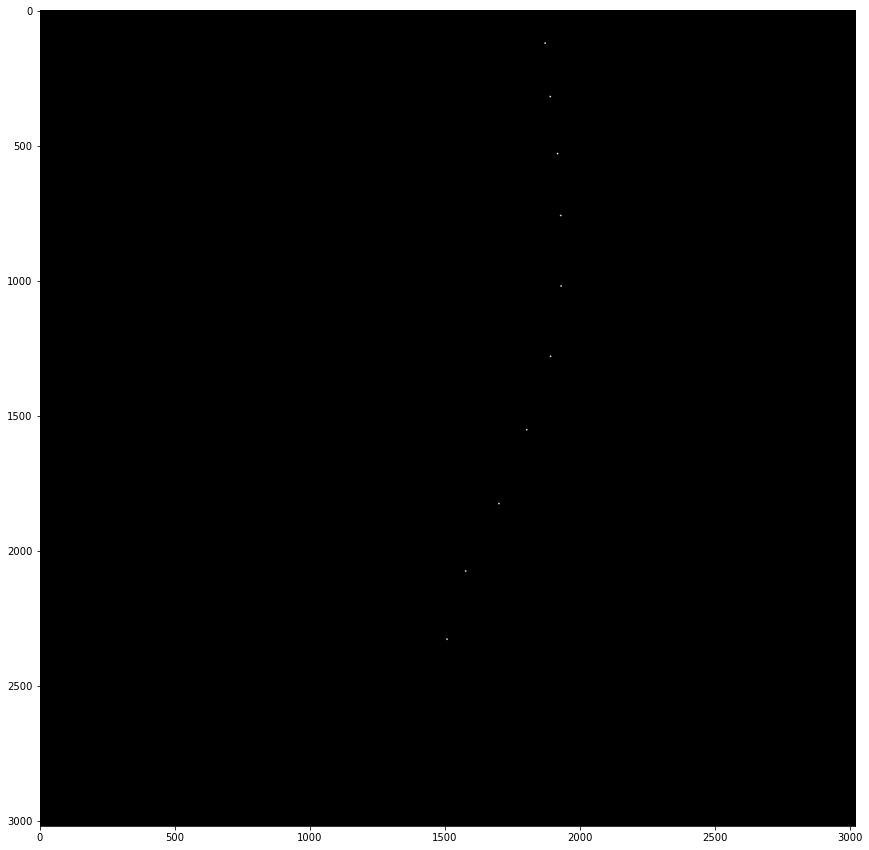

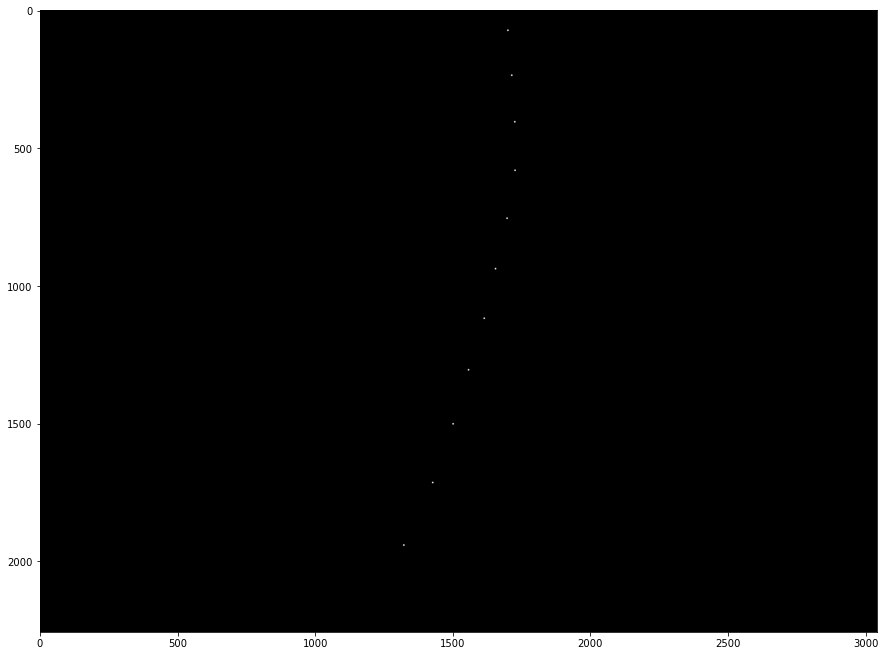

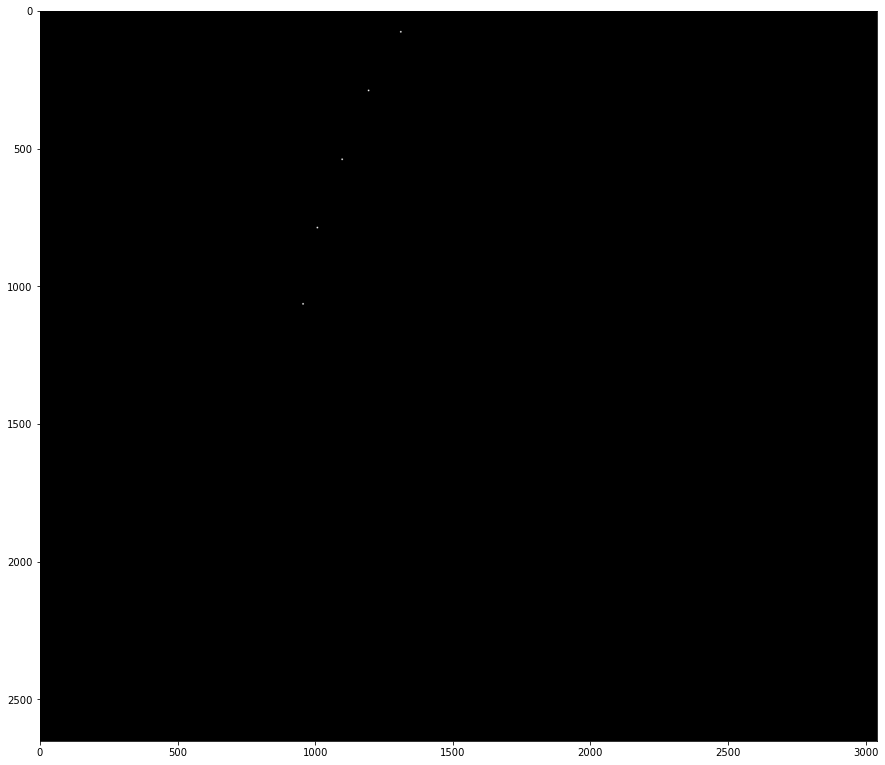

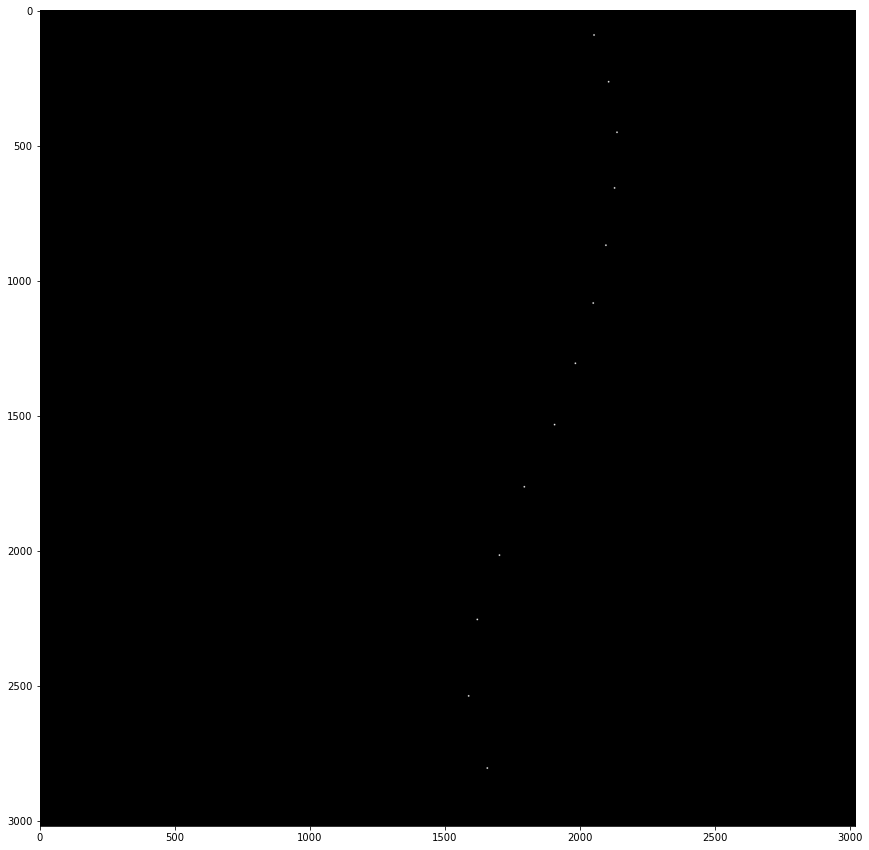

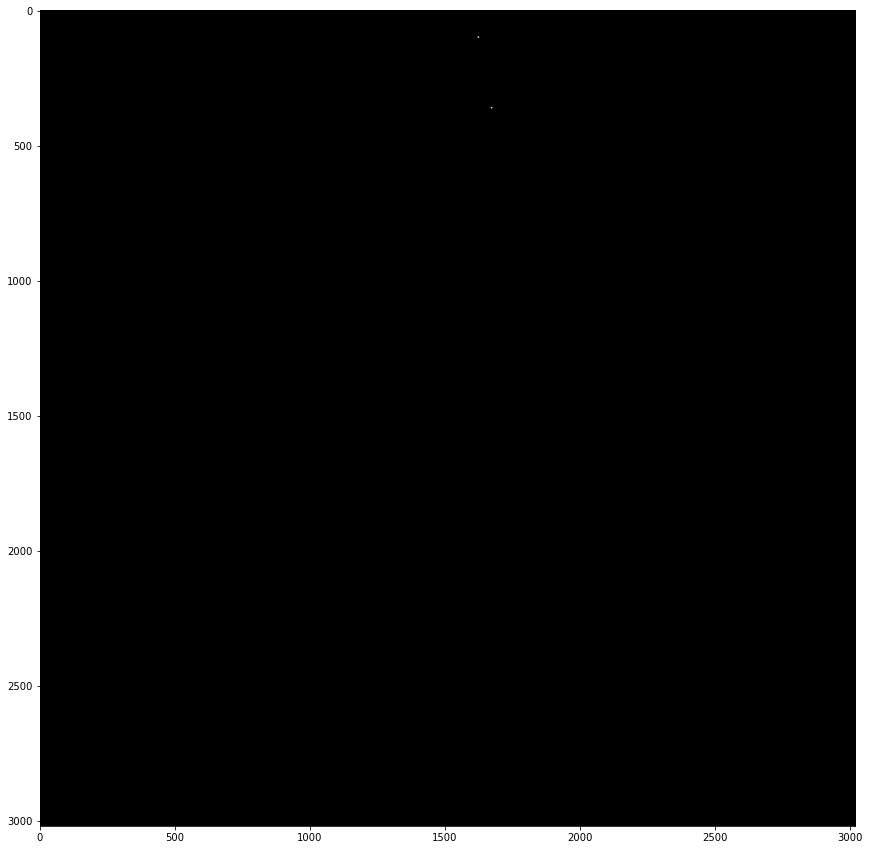

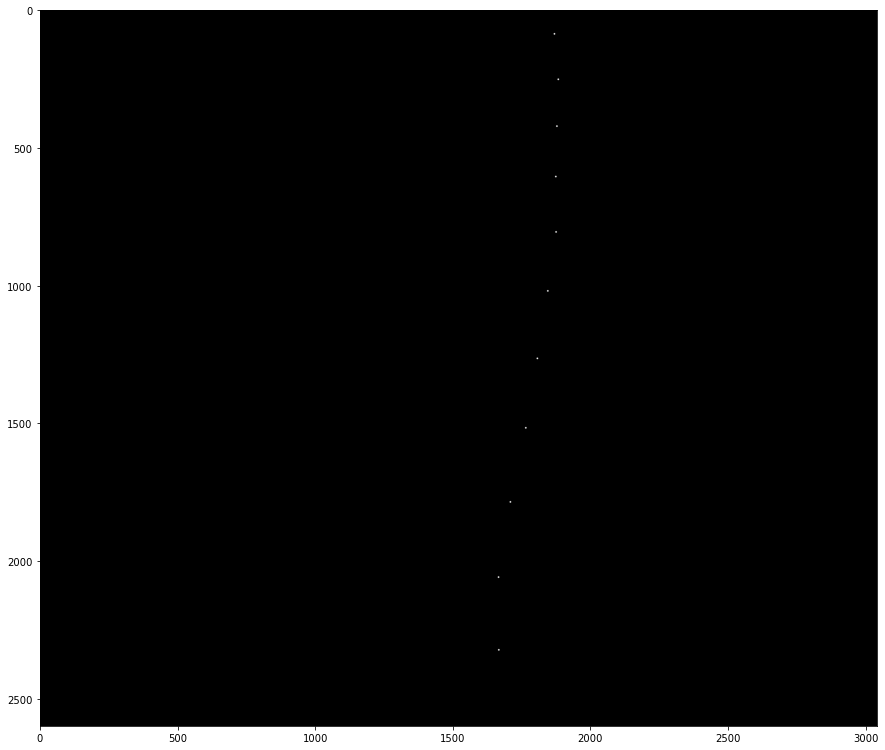

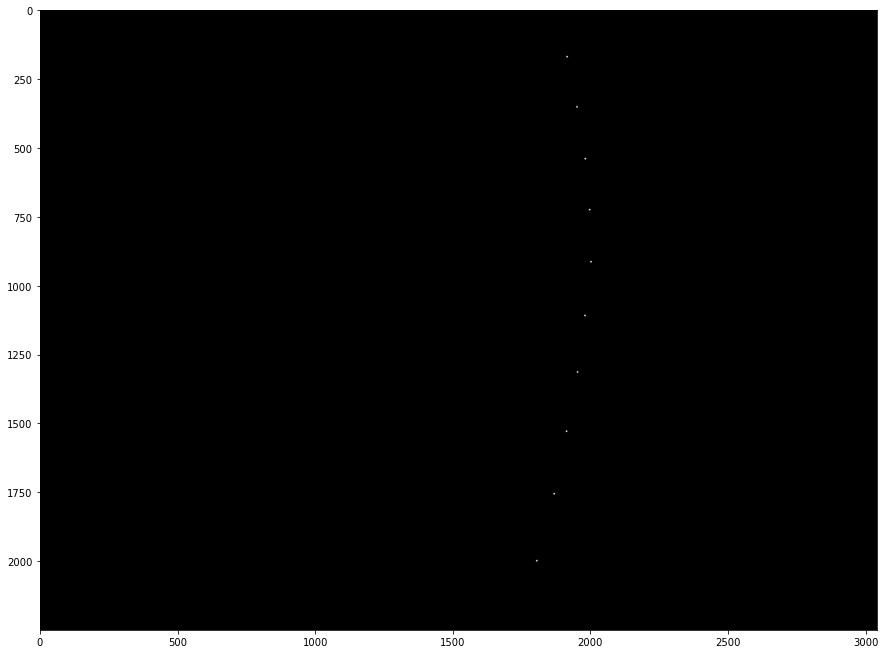

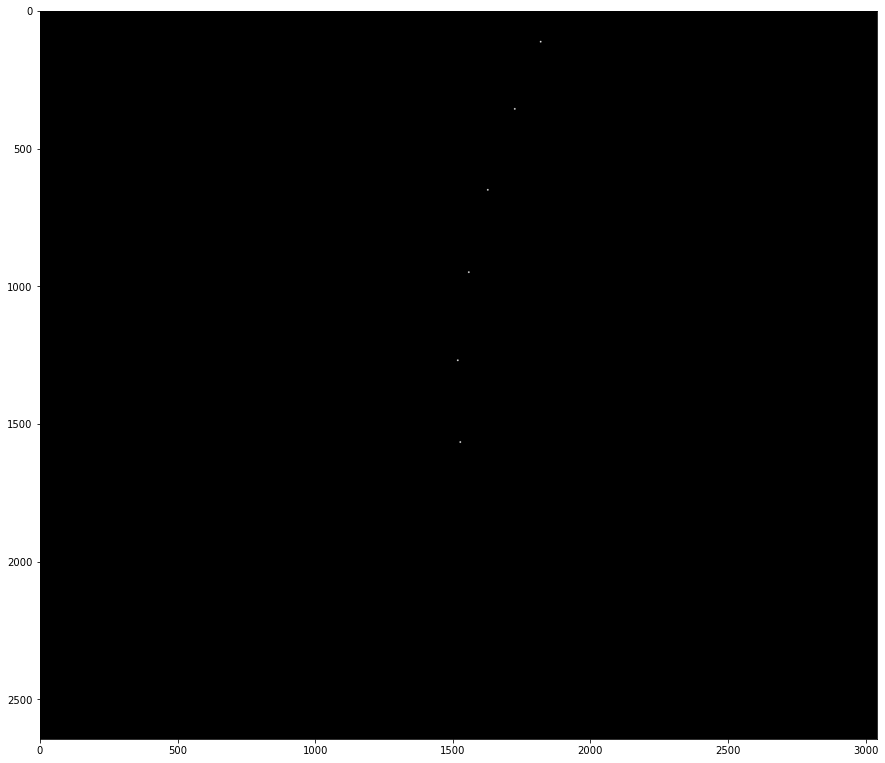

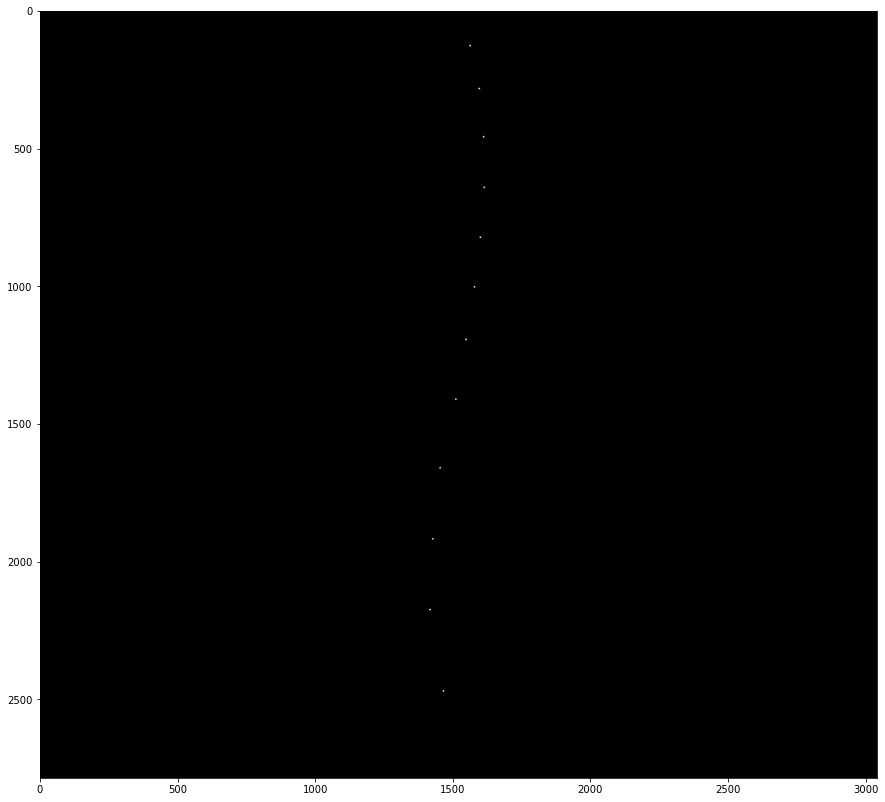

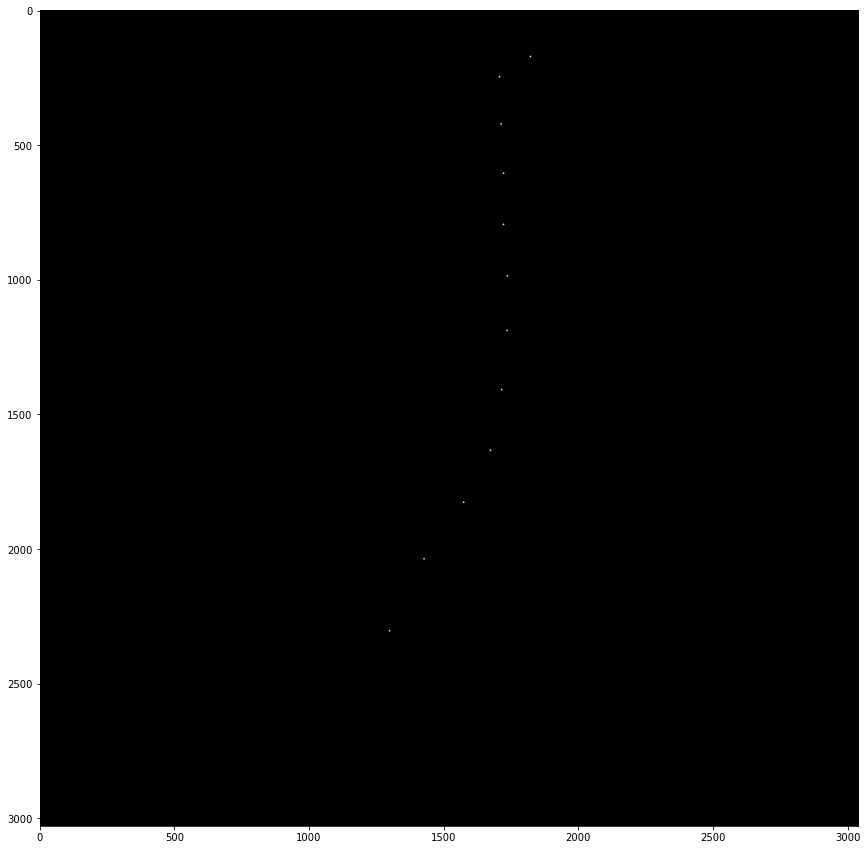

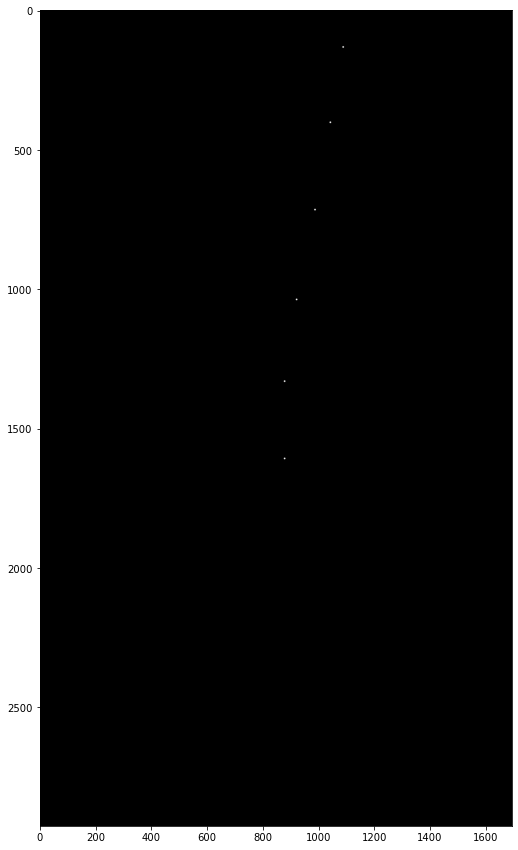

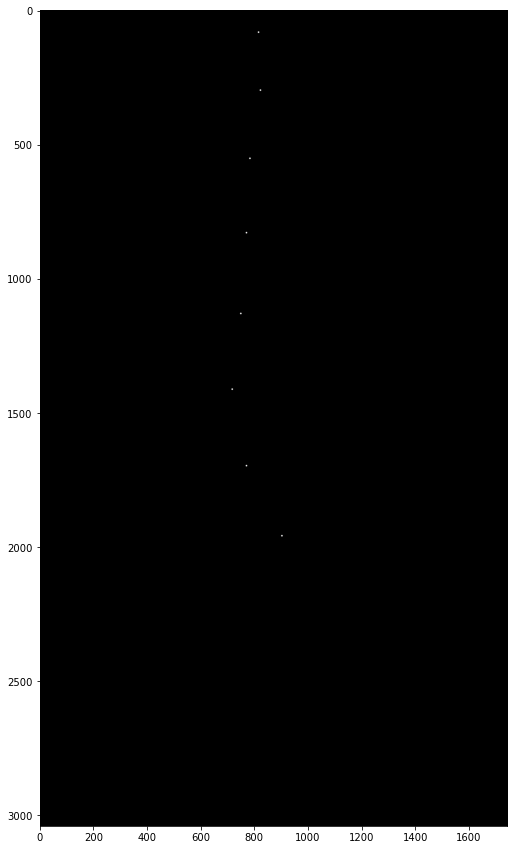

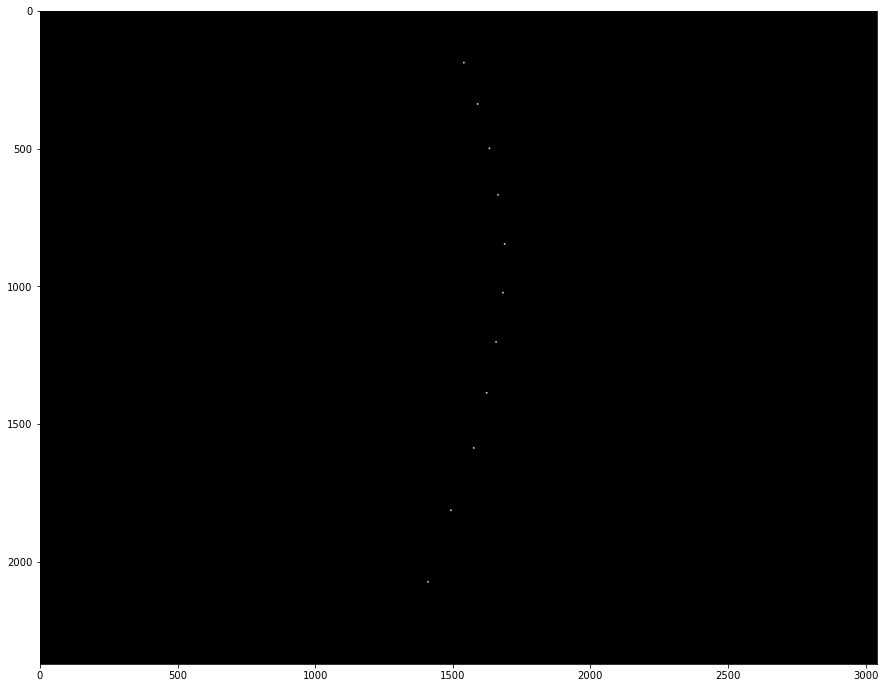

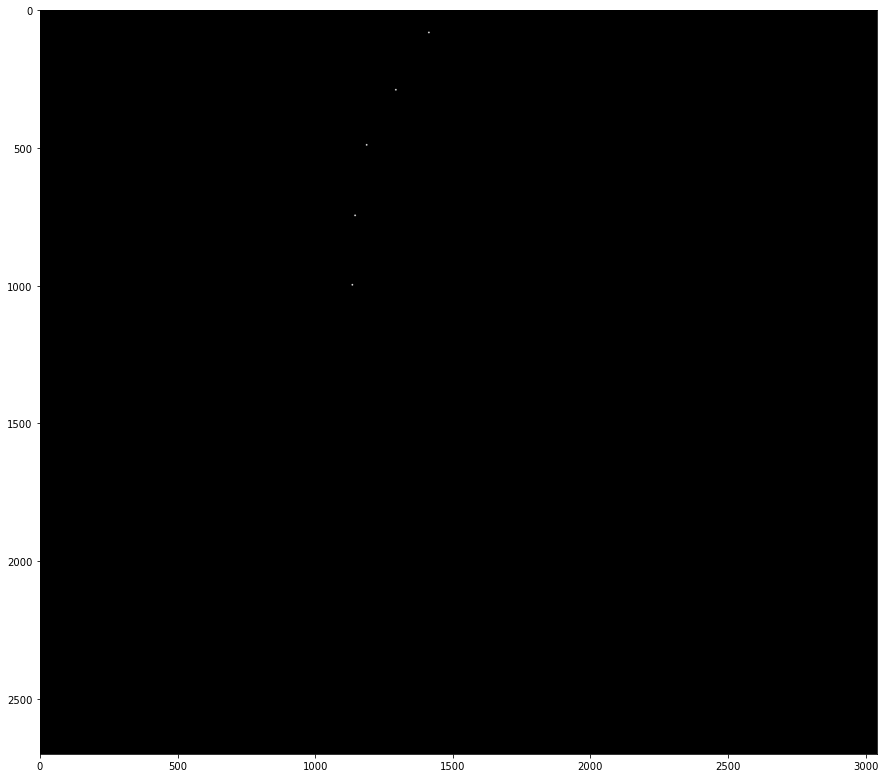

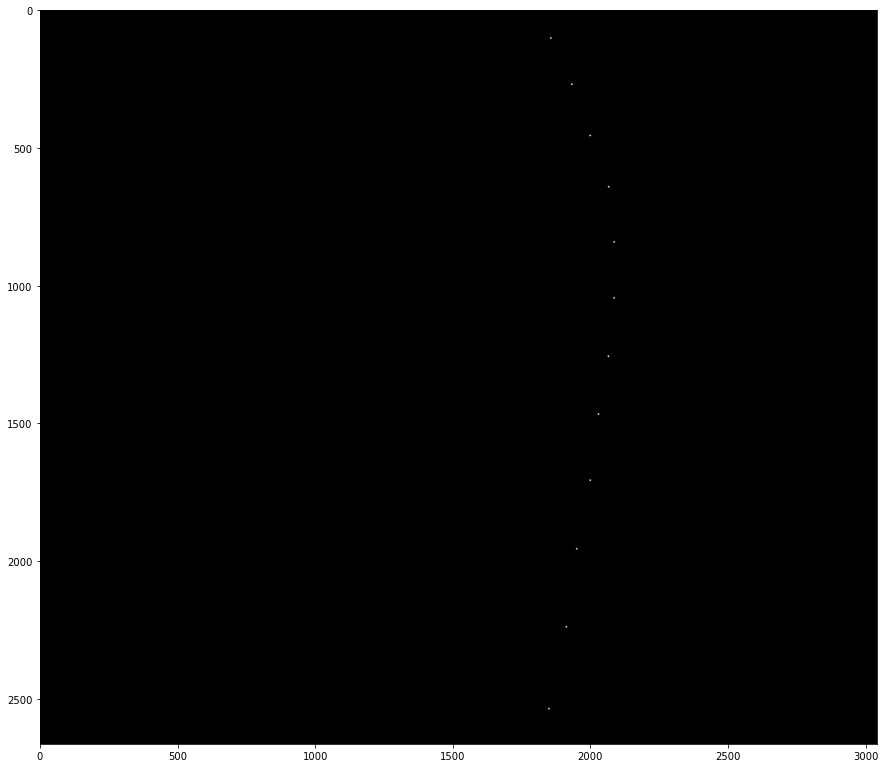

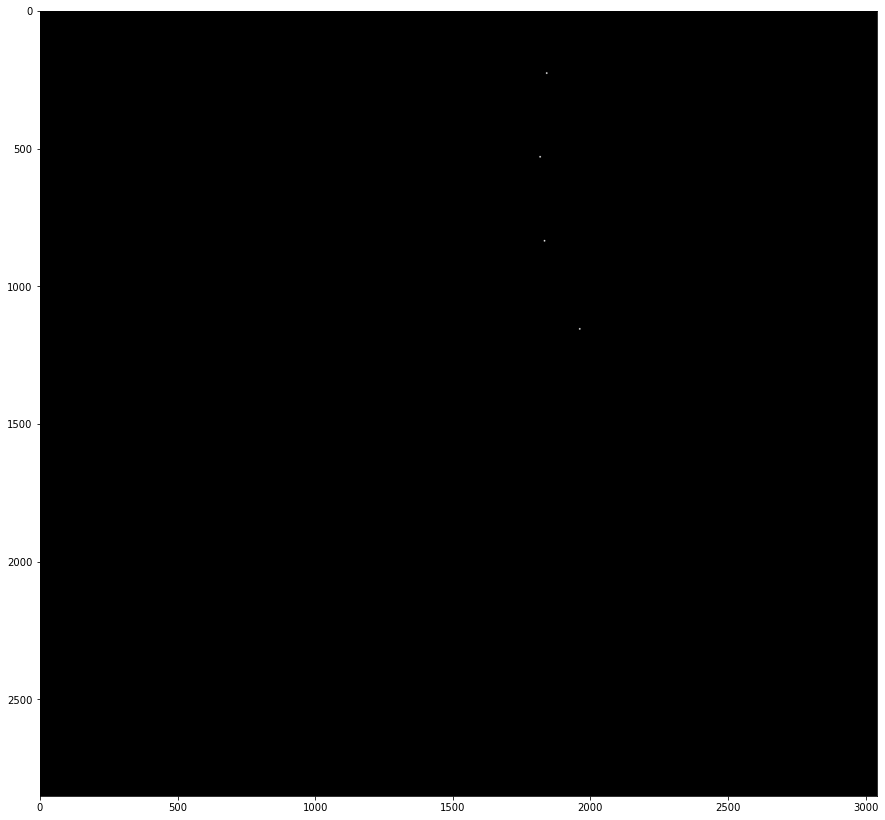

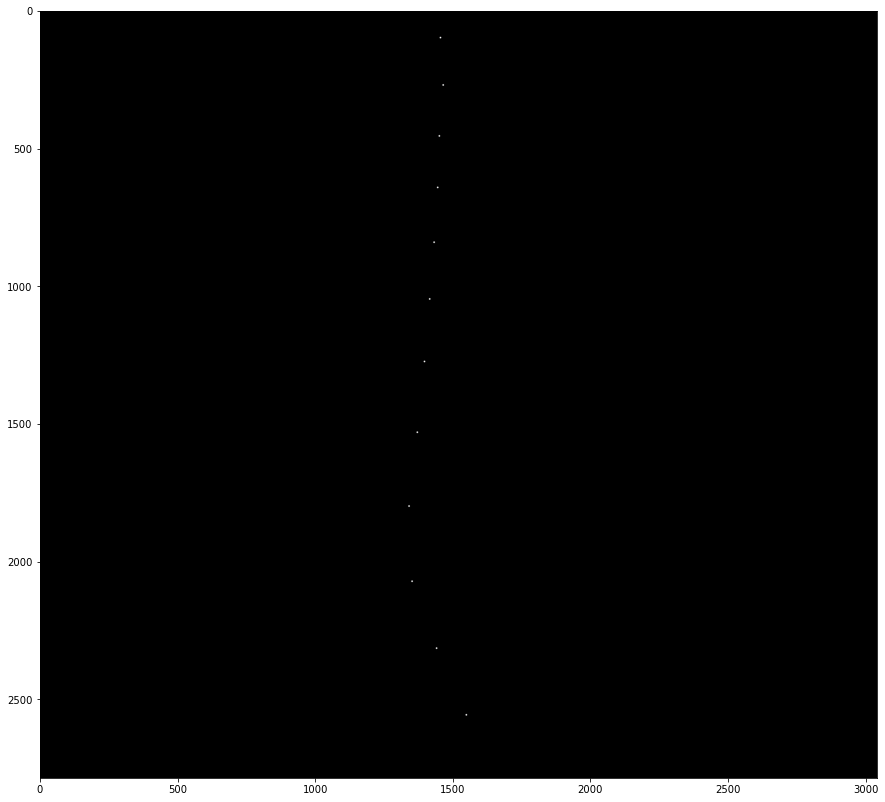

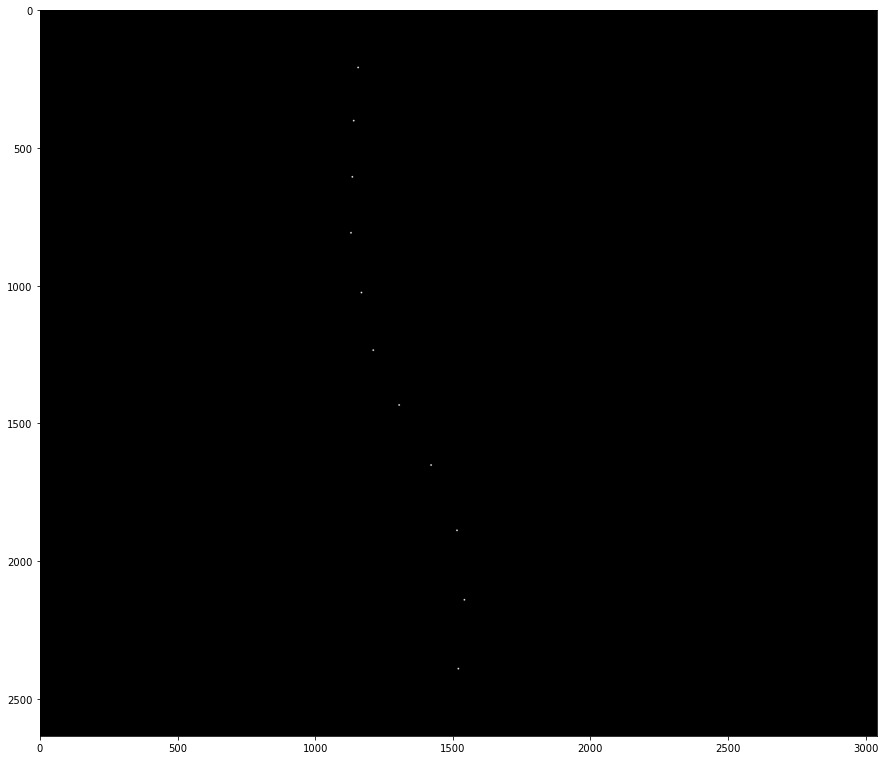

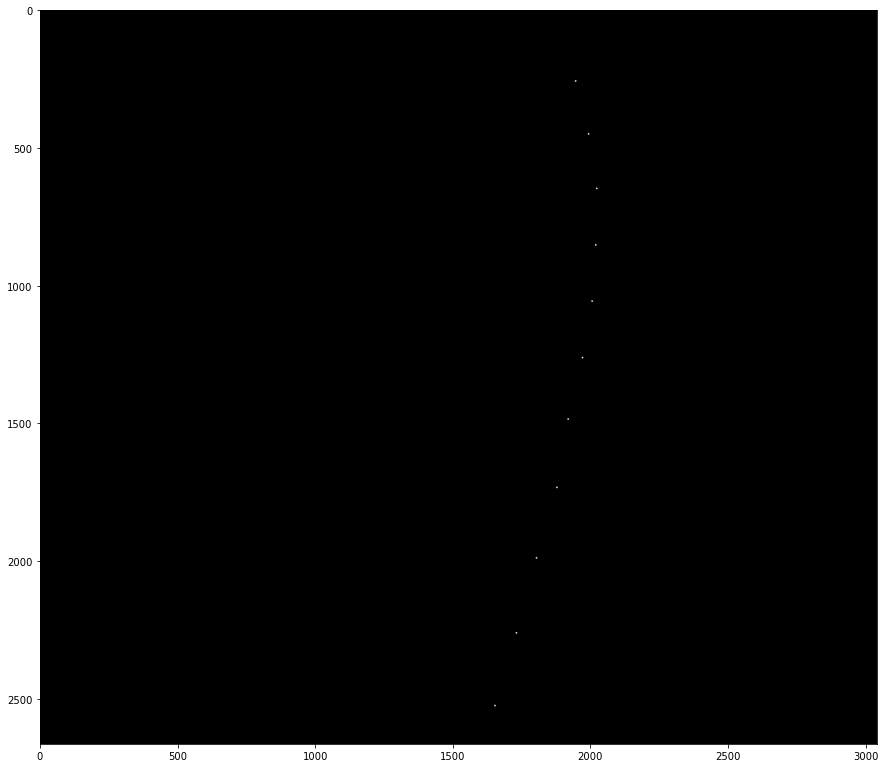

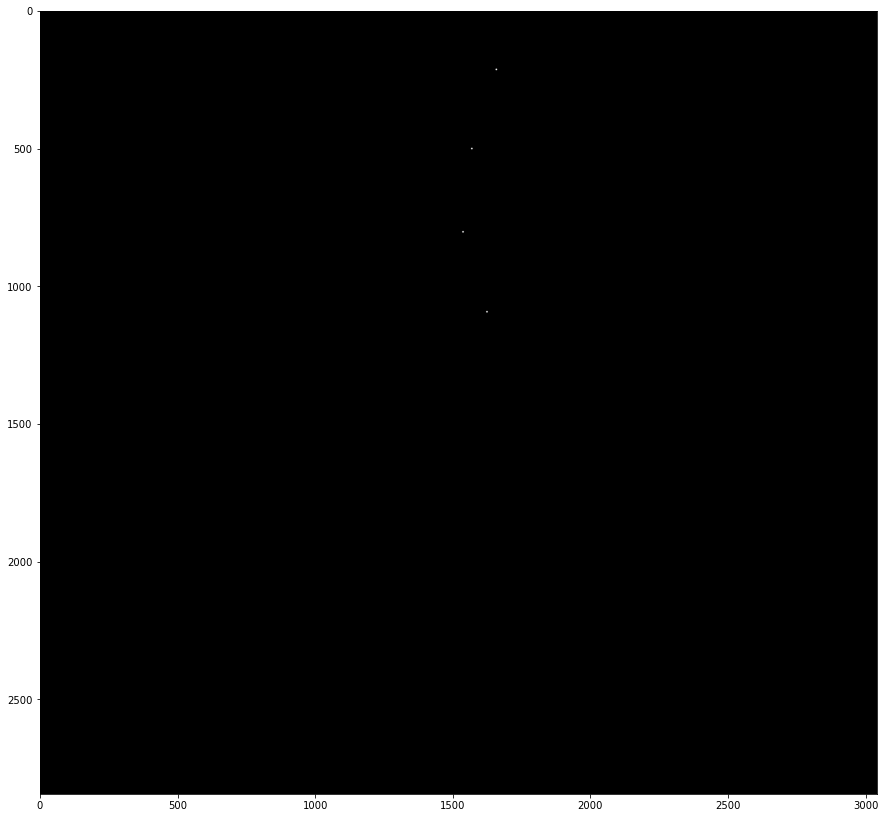

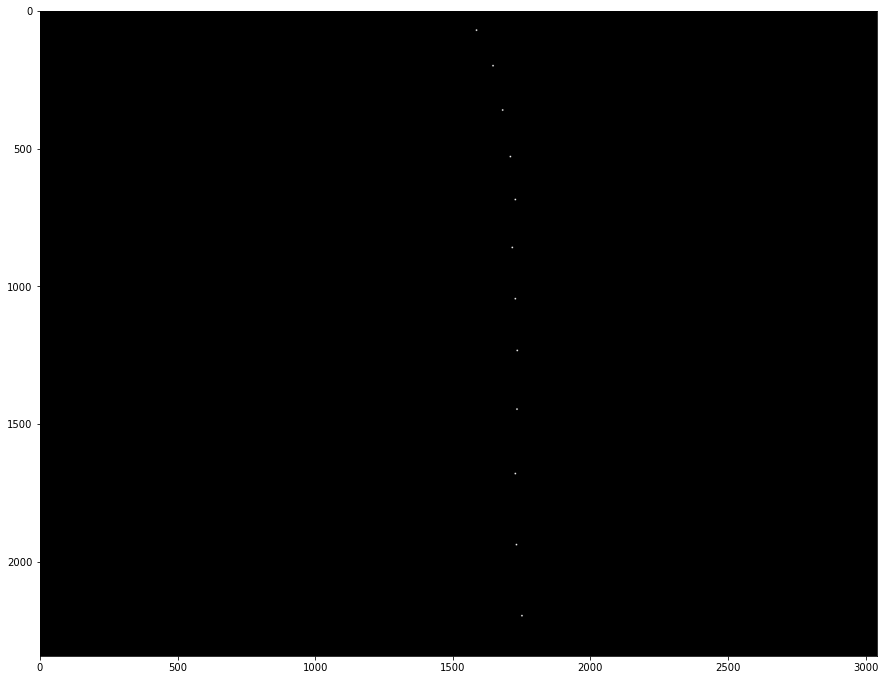

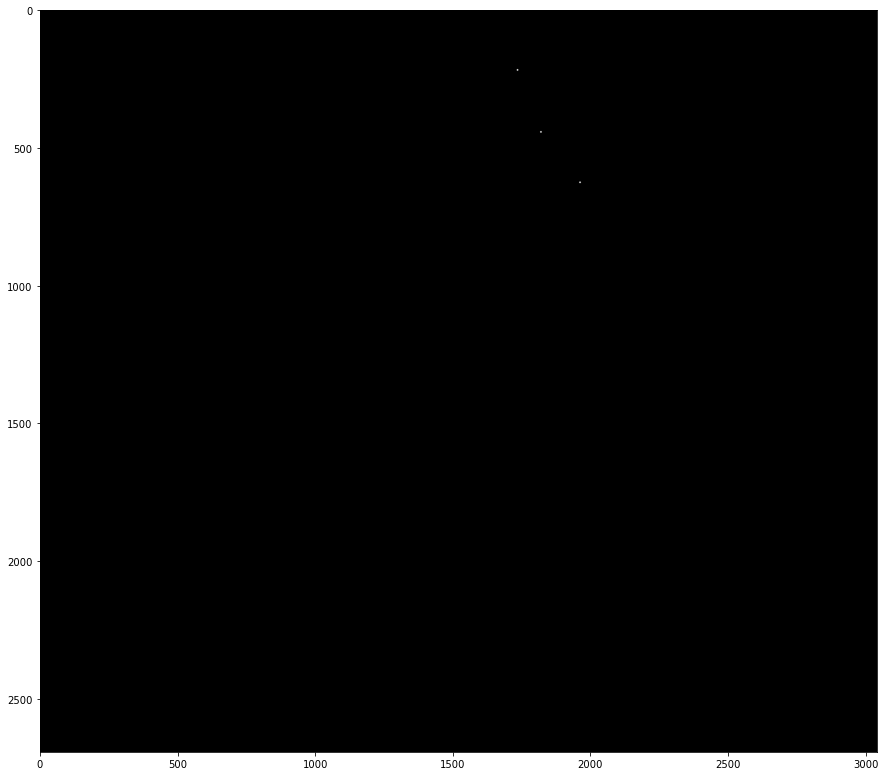

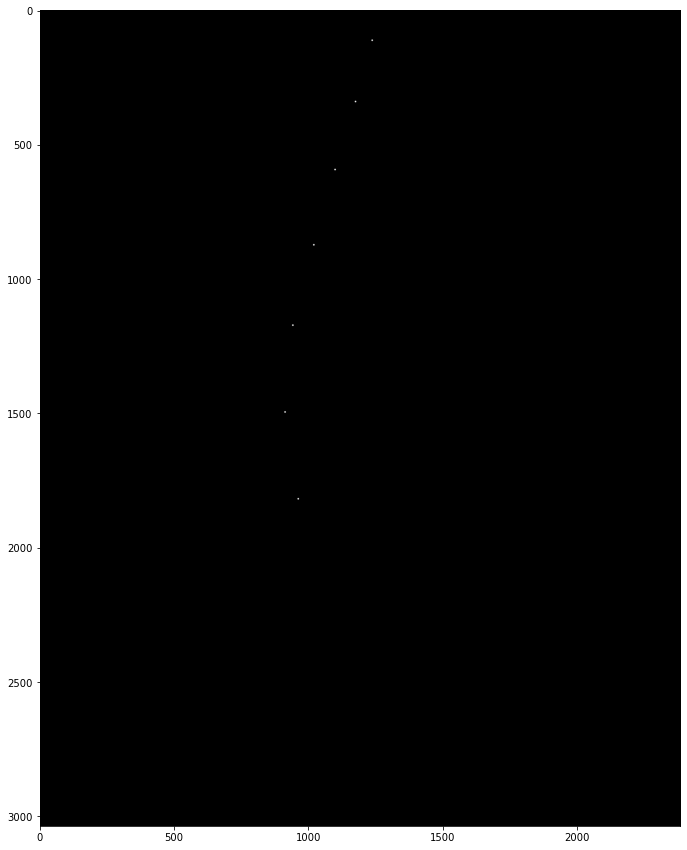

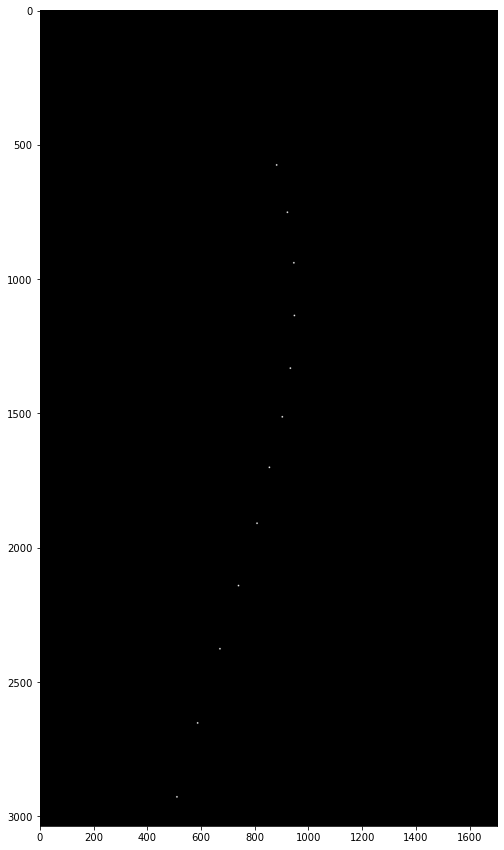

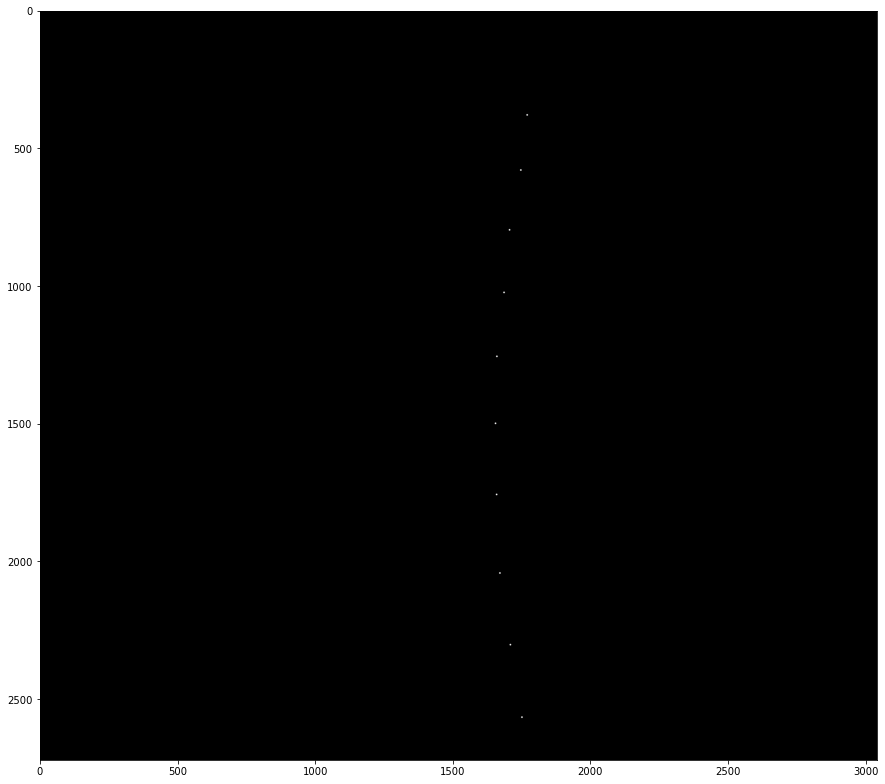

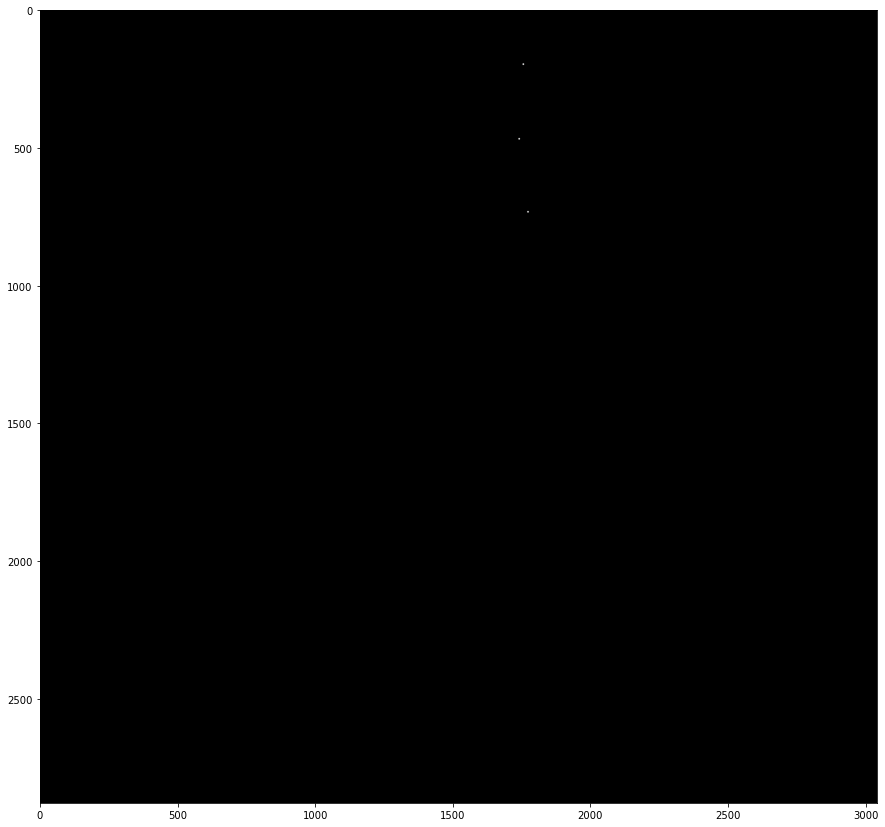

In [17]:
for image in os.listdir(ds_i_path):
    image_name = image.split('.')[-2]
    for mask in os.listdir(ds_m_path):
        mask_name = mask.split('.')[-2]
        
        if image_name == mask_name:
            image_c = cv2.imread(os.path.join(ds_i_path,image_name+'.jpg'),0)
            mask_c = cv2.imread(os.path.join(ds_m_path,mask_name+'.png'))
            mask_b = mask_c.copy()
            mask_gray = cv2.cvtColor(mask_c,cv2.COLOR_BGR2GRAY)
            mask_b[:,:]=0
            ret, thr = cv2.threshold(mask_gray,127,255,0)
            contours,_ = cv2.findContours(thr, cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)
            try:
                for cnt in contours:
                
                    M= cv2.moments(cnt)
                    cx = int(M['m10']/M['m00'])
                    cy = int(M['m01']/M['m00'])
                    center = cv2.circle(mask_b,(cx,cy),3,(255,255,255),-1)
                
                cv2.imwrite("./dongsam_train/center/"+mask_name+'.png',center)
#                 cv2.imwrite("./Lateral_deepnoid/spine/"+image_name+'.png',image_c)
#                 cv2.imwrite("./Lateral_deepnoid/mask/"+mask_name+'.png',mask_gray)
                plt.figure(figsize=(15,15))
                plt.imshow(center,'gray')
                plt.show()
            except:
                    print('e')

In [38]:
image_center= './dongsam_train/center/1951305_W_ser001img00009.png'

True

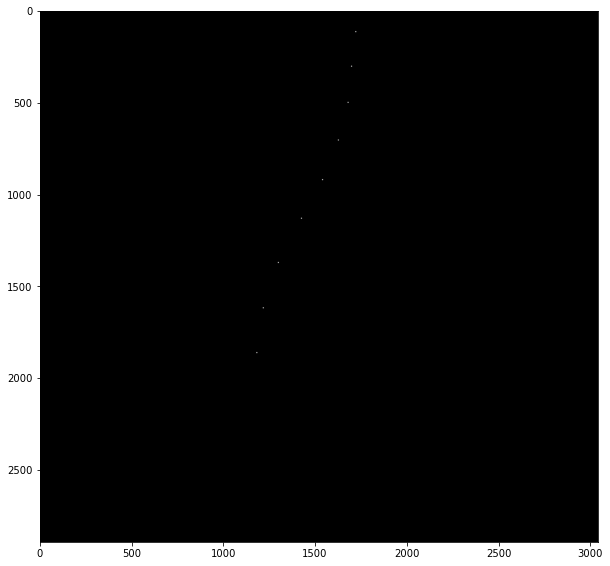

In [45]:
image = cv2.imread(image_center,0)
image[350:490,1500:1800]=0
image[600:700,1500:1800]=0
image[700:750,:1500]=0
plt.figure(figsize=(10,10))
plt.imshow(image,'gray')
cv2.imwrite('./dongsam_train/center/1951305_W_ser001img00009.png',image)